<center>

# Calculation of Energy Consumption and Associated Emissions of Employees Working from Home

[Jonathan Duque](https://www.linkedin.com/in/jonathan-duque-gonzalez-959134143/) - Supply Chain Analyst

## Introduction

</center>

The global shift towards remote and hybrid work models presents both a significant opportunity and a complex challenge for corporate sustainability efforts. Recent studies highlight the potential for substantial environmental benefits; a widespread shift to remote work could reduce an individual's carbon footprint by up to 58% for full-time remote employees and between 11-29% for those on a hybrid schedule ([Kuo & Nason, 2024](https://www.pnas.org/doi/full/10.1073/pnas.2304099120); [IEA, 2020](https://www.iea.org/commentaries/working-from-home-can-save-energy-and-reduce-emissions-but-how-much)). However, these gains can be partially offset by increases in residential energy consumption and changes in non-commute travel patterns.

This notebook provides a comprehensive and transparent methodology for measuring the energy consumption and associated greenhouse gas (GHG) emissions from homeworking. Our goal is to create a robust framework aligned with the [UK Government's Environmental Reporting Guidelines](https://www.gov.uk/government/publications/environmental-reporting-guidelines-including-mandatory-greenhouse-gas-emissions-reporting-guidance). While this methodology offers a detailed, bottom-up calculation—including factors like device usage, video conferencing, heating, and lighting—it is designed to be complemented by a new benchmarking section. This will allow organizations to compare their calculated emissions against industry peers, providing valuable context and supporting the development of effective, data-driven emissions reduction strategies.

<center>

#### The GHG Protocol and Homeworking Emissions
</center>

While the Greenhouse Gas Protocol (GHGp), a key emissions accounting standard used by over 90% of Fortune 500 companies reporting to Carbon Disclosure Project (CDP),includes homeworking emissions, accurately quantifying them is difficult, and reporting them is currently optional under the 'Employee Commuting' section. According to [EcoAct's 'Homeworking emissions whitepaper' (2020)](https://info.eco-act.com/en/homeworking-emissions-whitepaper-2020?_gl=1), which is endorsed by the Department for Energy Security & Net Zero in their ['Methodology Paper for Conversion Factors Final Report' (2023)](https://assets.publishing.service.gov.uk/media/66a9fe4ca3c2a28abb50da4a/2024-greenhouse-gas-conversion-factors-methodology.pdf), this presents a few challenges:

* **No Standardised Methodology:** The GHGp doesn't offer a clear method for calculating homeworking emissions, making it difficult to compare data across organisations.
* **Potential for Underreporting:** Without consistent reporting, companies may inadvertently obscure the true impact of their operations on the environment.
* **Difficulty in Benchmarking:** Comparing year-on-year performance becomes less reliable when homeworking emissions aren't consistently factored in.

<center>

### Three Methods
</center>

In its research paper, [Green Element (2023)](https://www.greenelement.co.uk/environmental-and-sustainability-ebooks/working-from-home-emissions/) outlines three main methods for calculating emissions from working from home. The choice of the method depends on the business's motivation for including this category and the feasibility of each method, including the time and cost required to implement and analyse them.

The benchmarking analysis of the technology services sector confirms that companies select and adapt these methods based on their operational scale and reporting maturity.

* **The First Method:** Utilises the average energy intensity (e.g., energy consumed per person per day) by geographical region. This option is the simplest of the three, as it requires no survey, fewer resources, and minimal company information (only the total number of workers). This is the basic method contained in the EcoAct white paper. This approach is favored for its scalability and is used by major technology services firms like **Accenture**, which leverages statistical data from the IEA and national agencies, and **Capgemini**, which employs a model based on the EcoAct methodology.

* **The Second Method:** Requires a basic survey to reduce the assumptions made in the no-survey method, including specific energy types and equipment used. Whilst this method requires more time and resources to implement and analyse results, it is a very cost-effective approach to undertake every two to three years. It serves as a practical middle ground, allowing for greater accuracy than regional averages without the complexity of a comprehensive survey.

* **The Third Method:** Is a comprehensive survey that asks a series of specific questions to understand employees’ behaviours, household characteristics, energy providers, and other factors that may influence energy usage. This is the most time- and resource-intensive but by far the most accurate means for capturing employee-specific consumption during working hours from home. As noted, **Google** uses this approach. **Microsoft** employs a sophisticated version of this method, combining detailed employee surveys with statistical modeling and regional grid intensity data to account for seasonal variations and produce a more dynamic emissions profile.

Companies often do not adhere strictly to one method but instead create **hybrid models** tailored to their specific needs. A company might begin with Method 1 for a baseline and then introduce elements of a basic survey (Method 2) to refine key assumptions, such as the mix of heating fuels. This blended approach allows for continuous improvement in accuracy over time, aligning with the growing demand from stakeholders and reporting frameworks for more robust and data-driven Scope 3 emissions accounting.

[EcoAct's (2020)](https://info.eco-act.com/en/homeworking-emissions-whitepaper-2020?_gl=1) recommends the use of specific data obtained (primarily through a staff survey) where it is material to the reporting company’s footprint.

Furthermore, [Green Element (2023)](https://www.greenelement.co.uk/environmental-and-sustainability-ebooks/working-from-home-emissions/) suggests that companies already gathering employee travel data for emissions reporting can integrate questions about working from home emissions into their existing surveys, eliminating the need for separate questionnaires.

---
<center>

## Survey Simulation
</center>

Before deploying the survey compiled and tested by [Green Element](https://www.greenelement.co.uk/environmental-and-sustainability-ebooks/working-from-home-emissions/), it is important to simulate a scenario to ensure the survey aligns with the company's reality (staff are not only based in the UK but also in 16 other countries, for instance).

The first step involves creating a dataset comprising responses from 100 participants, detailing their daily work routines and home office setups. This includes information on the types and durations of energy consumption associated with different devices and heating/cooling systems. The dataset will serve as a foundation for analysing energy use patterns, accounting for GHG emissions, and identifying opportunities for efficiency improvements.

### Data Points Included:
- **Work Hours and Frequency**: Captures daily and weekly work hours to correlate with energy usage patterns.
- **Device Usage**: Information on the number of laptops, desktops, and monitors used, including their respective power consumption.
- **Lighting**: Calculates the energy used based on specific lights.
- **Energy Consumption for Heating and Cooling**: Details on heating and cooling habits, including types of systems used, hours of operation, and energy source types.
- **Location-Specific Data**: Addresses the geographical diversity of respondents which influence emissions factors.

### Survey Data Structure
The DataFrame consists of the following columns:
- `Respondent`: Identifier for survey participants.
- `Hours_Per_Day`, `Days_Per_Week`, `Weeks_Per_Year`: Work schedule details.
- `Desktops`, `Laptops`, `Monitors`: Count of each type of device used.
- `Video_Call_Hours_Per_Week`: Hours spent on video calls, impacting device usage.
- `Lights_On`, `Light_Type`, `Switch_Off`: Lighting usage and habits.
- `Renewable_Energy`, `Additional_Heating`, `Heating_Hours_Per_Day`, etc.: Details on heating and cooling practices.

To assist respondents in estimating their energy consumption, we have adapted a guide from [OVO Energy](https://www.ovoenergy.com/guides/energy-guides/how-much-heating-energy-do-you-use). This guide offers step-by-step instructions and examples for calculating energy usage related to heating and cooling.

In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os
from pathlib import Path
import warnings

warnings.filterwarnings("ignore")

# Set high resolution for all plots
plt.rcParams['figure.dpi'] = 300

In [2]:

# Seed for reproducibility
np.random.seed(42)

# Number of responses
num_responses = 100

# Define unit choices for different heating fuel types
fuel_units = {
    'Gas': 'kWh',
    'Electricity': 'kWh',
    'Oil': 'Litres',
    'Solid_Fuel_Coal': 'Kg',
    'Solid_Fuel_Wood': 'Kg',
    'Heat Pump': 'kWh',
    'Other': 'kWh'  # Other options are electricity-based
}

# Lists of fuel types for conditional value generation
kwh_fuels = ['Electricity', 'Gas', 'Heat Pump']
amount_fuels = ['Oil', 'Solid_Fuel_Coal', 'Solid_Fuel_Wood', 'Other']

additional_heating = np.random.choice(["Yes", "No"], num_responses, p=[0.8, 0.2])  
use_cooling = np.random.choice(["Yes", "No"], num_responses, p=[0.3, 0.7])  

heating_hours_per_day = np.where(additional_heating == "Yes", np.random.randint(1, 9, num_responses), 0)
heating_months_per_year = np.where(additional_heating == "Yes", np.random.randint(1, 7, num_responses), 0)
heating_area = np.where(additional_heating == "Yes", np.random.choice(["One_Room", "Whole_House", "More_Than_One_Room"], num_responses), "None")
heating_fuels = np.where(additional_heating == "Yes", np.random.choice(list(fuel_units.keys()), num_responses), "None")
heating_fuel_units = [fuel_units[fuel] if fuel in fuel_units else 'None' for fuel in heating_fuels]

# Generate heating data conditionally based on fuel type
heating_monthly_kWh = np.where(np.isin(heating_fuels, kwh_fuels), np.random.randint(0, 2000, num_responses), 0)
heating_fuel_amount = np.where(np.isin(heating_fuels, amount_fuels), np.random.choice([200, 300, 400, 500], num_responses), 0)
other_heating_types = np.where(heating_fuels == 'Other', np.random.choice(['Split_AC', 'Ceiling_Fan'], num_responses), "None")  

cooling_monthly_kWh = np.where(use_cooling == "Yes", np.random.randint(180, 2000, num_responses), 0)
cooling_hours_per_day = np.where(use_cooling == "Yes", np.random.randint(1, 10, num_responses), 0)
cooling_months_per_year = np.where(use_cooling == "Yes", np.random.randint(1, 7, num_responses), 0)
cooling_type = np.where(use_cooling == "Yes", np.random.choice(["Central_AC", "Window_Wall_Unit", "Portable_Fans", "Other"], num_responses), "None")
thermostat = np.where(use_cooling == "Yes", np.random.choice(["Yes", "No"], num_responses), "None")

survey_data = {
    "Respondent": range(1, num_responses + 1),
    "Hours_Per_Day": np.random.choice([4, 5, 6, 7, 8, 9], num_responses),
    "Days_Per_Week": np.random.choice([3, 4, 5], num_responses),
    "Weeks_Per_Year": np.random.choice([30, 35, 40, 45, 48], num_responses),
    "Desktops": np.random.choice([0, 1], num_responses, p=[0.6, 0.4]),
    "Laptops": np.random.choice([1, 2], num_responses, p=[0.7, 0.3]),
    "Monitors": np.random.choice([0, 1, 2], num_responses, p=[0.2, 0.5, 0.3]),
    "Video_Call_Hours_Per_Week": np.random.choice(range(1, 15), num_responses),
    "Lights_On": np.random.choice(["Always", "Sometimes", "Never"], num_responses, p=[0.4, 0.5, 0.1]),
    "Light_Type": np.random.choice(["LEDs", "Halogen", "Tungsten"], num_responses, p=[0.7, 0.2, 0.1]),
    "Switch_Off": np.random.choice(["Always", "Sometimes", "Never"], num_responses, p=[0.5, 0.4, 0.1]),
    "Renewable_Energy": np.random.choice(["Yes", "No", "Don't Know"], num_responses, p=[0.4, 0.4, 0.2]),
    "Additional_Heating": additional_heating,
    "Heating_Hours_Per_Day": heating_hours_per_day,
    "Heating_Months_Per_Year": heating_months_per_year,
    "Heating_Area": heating_area,
    "Heating_Fuel": heating_fuels,
    "Heating_Fuel_Amount": heating_fuel_amount,
    "Heating_Fuel_Unit": heating_fuel_units,
    "Heating_Monthly_kWh": heating_monthly_kWh,
    "Other_Heating_Type": other_heating_types,
    "Use_Cooling": use_cooling,
    "Cooling_Type": cooling_type,
    "Cooling_Monthly_kWh": cooling_monthly_kWh,
    "Cooling_Hours_Per_Day": cooling_hours_per_day,
    "Cooling_Months_Per_Year": cooling_months_per_year,
    "Thermostat": thermostat,
    "Primary_Work_Location": np.random.choice(
        ["Albania", "India", "Nigeria", "Macedonia", "Bolivia", 
         "Pakistan", "Philippines", "Portugal", "Romania", "Colombia",
         "Spain", "Turkey", "UK"],
        num_responses,
        p=[
            0.01, 0.07, 0.04,
            0.01, 0.01, 0.01, 0.01,
            0.01, 0.01, 0.01, 0.05, 0.01, 0.75
        ]
    )
}

# Create DataFrame
survey_df = pd.DataFrame(survey_data)

# Display the DataFrame
survey_df.head()

,Respondent,Hours_Per_Day,Days_Per_Week,Weeks_Per_Year,Desktops,Laptops,Monitors,Video_Call_Hours_Per_Week,Lights_On,Light_Type,...,Heating_Fuel_Unit,Heating_Monthly_kWh,Other_Heating_Type,Use_Cooling,Cooling_Type,Cooling_Monthly_kWh,Cooling_Hours_Per_Day,Cooling_Months_Per_Year,Thermostat,Primary_Work_Location
0,1,8,5,48,0,1,1,5,Sometimes,LEDs,...,kWh,1350,None,Yes,Central_AC,846,6,3,Yes,Colombia
1,2,6,4,35,0,2,2,12,Sometimes,LEDs,...,None,0,None,No,None,0,0,0,None,India
2,3,7,3,45,0,1,2,5,Always,LEDs,...,Kg,0,None,No,None,0,0,0,None,UK
3,4,8,3,40,0,1,1,1,Always,Halogen,...,kWh,1155,None,No,None,0,0,0,None,UK
4,5,7,5,35,0,1,2,1,Sometimes,Halogen,...,kWh,1827,None,No,None,0,0,0,None,UK


In [3]:
save_path = os.path.join('..', 'Methodology')
file_name = 'hw_simulated_survey_data.csv'
full_path = os.path.join(save_path, file_name)

# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)

# Save the DataFrame
survey_df.to_csv(full_path, index=False)

print(f"DataFrame successfully saved as '{file_name}'.")

DataFrame successfully saved as 'hw_simulated_survey_data.csv'.


<center>

### Hours Worked from Home
</center>

The survey focuses on energy used specifically during working hours, rather than relying on broader regional or national energy consumption averages that encompass all-day usage. To determine individual energy consumption during remote work, the survey first collects data on the number of hours worked from home.

**Q1. How many hours do you typically work from home on an average day?**

**Q2. On average, how many days per week do you work from home?**

**Q3. How many weeks per year do you typically work from home?** (Please consider your usual working patterns and subtract any annual leave or other time off)

These questions allow us to calculate the total hours worked from home using a simple formula.

$$\
\boxed{\text{Total Hours Worked} = \text{Hours per Day} \times \text{Days per Week} \times \text{Weeks per Year}}
$$\

In [4]:
# Total hours worked from home over the year by each respondent
survey_df['Total_Hours_Worked'] = survey_df['Hours_Per_Day'] * survey_df['Days_Per_Week'] * survey_df['Weeks_Per_Year']

survey_df.head()

,Respondent,Hours_Per_Day,Days_Per_Week,Weeks_Per_Year,Desktops,Laptops,Monitors,Video_Call_Hours_Per_Week,Lights_On,Light_Type,...,Heating_Monthly_kWh,Other_Heating_Type,Use_Cooling,Cooling_Type,Cooling_Monthly_kWh,Cooling_Hours_Per_Day,Cooling_Months_Per_Year,Thermostat,Primary_Work_Location,Total_Hours_Worked
0,1,8,5,48,0,1,1,5,Sometimes,LEDs,...,1350,None,Yes,Central_AC,846,6,3,Yes,Colombia,1920
1,2,6,4,35,0,2,2,12,Sometimes,LEDs,...,0,None,No,None,0,0,0,None,India,840
2,3,7,3,45,0,1,2,5,Always,LEDs,...,0,None,No,None,0,0,0,None,UK,945
3,4,8,3,40,0,1,1,1,Always,Halogen,...,1155,None,No,None,0,0,0,None,UK,960
4,5,7,5,35,0,1,2,1,Sometimes,Halogen,...,1827,None,No,None,0,0,0,None,UK,1225


---
<center>

### Workstations Energy Consumption
</center>

To understand how much energy employees use while working from home, we look at the types of devices they use and how long they keep them switched on. We use data from the survey to calculate the energy consumption of different home office setups, such as the number of computers and monitors they use.

#### Calculations for Workstation Setups

Questions **Q4, Q5** & **Q6** are used to estimate the electricity usage of all electrical equipment used whilst working. To quantify this, the average power consumption (Watts) of running each equipment type was researched by [Green Element (2023)](https://www.google.com/url?sa=E&source=gmail&q=https://www.greenelement.co.uk/environmental-and-sustainability-ebooks/working-from-home-emissions/):

1.  **Total energy consumption by device type per hour:**

    *   Laptops: $60 \, \text{Watts}$
    *   Monitors: $20 \, \text{Watts}$
    *   Desktops: $100 \, \text{Watts}$

#### kWh from Video Conferencing

According to [Green Element (2023)](https://www.google.com/url?sa=E&source=gmail&q=https://www.greenelement.co.uk/environmental-and-sustainability-ebooks/working-from-home-emissions/), the energy consumption of video conferencing is an important consideration for remote working environments that has often been overlooked. Studies have shown that one hour of video conferencing uses about $0.0214 \, \text{kWh}$ of electricity, translating to significant energy use over time.

$$
\boxed{\text{Total kWh from Video Conferencing} = \text{Hours spent on video calls per week} \times 0.0214}
$$

The following script processes the survey data to estimate the weekly, daily, and monthly energy consumption for each workstation. The energy calculations are adjusted based on:

*   **Device power ratings**: The specific power consumption rate of each device type (laptop, monitor, desktop).
*   **Operational hours**: Adjustments are made based on the respondent's answers to how often they switch off their devices, impacting active usage hours.

In [5]:
# Mapping 'Switch_Off' response to active working hour percentage
switch_off_adjustment = {
    'Always': 1.0,   # Reduces the working hours by 1 hour
    'Sometimes': 0.5,  # Reduces the working hours by 0.5 hours on average
    'Never': 0.0    # No reduction in working hours
}

# Calculate total weekly hours from survey responses
survey_df['Total_Weekly_Hours'] = survey_df['Hours_Per_Day'] * survey_df['Days_Per_Week']

# Apply adjustments to total weekly hours based on 'Switch_Off' habits
survey_df['Active_Weekly_Hours'] = survey_df['Total_Weekly_Hours'] - (
    survey_df['Switch_Off'].map(switch_off_adjustment) * survey_df['Days_Per_Week']
)

# Calculate weekly workstation energy consumption with adjusted hours
survey_df['Adjusted_Weekly_Workstation_Energy_kWh'] = (
    (survey_df['Desktops'] * 100 + survey_df['Laptops'] * 60 + survey_df['Monitors'] * 20) / 1000  # Convert watts to kWh
    * survey_df['Active_Weekly_Hours']
)

# Calculate weekly energy consumption for video calls with adjusted hours
survey_df['Adjusted_Weekly_Video_Call_Energy_kWh'] = (
    survey_df['Video_Call_Hours_Per_Week'] * 0.0214  # Energy per hour of video calling
)

# Sum up the total adjusted weekly energy consumption
survey_df['Adjusted_Total_Weekly_kWh_Used_Workstation'] = (
    survey_df['Adjusted_Weekly_Workstation_Energy_kWh'] + survey_df['Adjusted_Weekly_Video_Call_Energy_kWh']
)

# Calculate daily and monthly workstation energy consumption
survey_df['Adjusted_Daily_Workstation_Energy_kWh'] = (
    survey_df['Adjusted_Total_Weekly_kWh_Used_Workstation'] / survey_df['Days_Per_Week']
)

# Calculate monthly workstation energy consumption using the Weeks_Per_Year from the dataset
survey_df['Adjusted_Monthly_Workstation_Energy_kWh'] = (
    survey_df['Adjusted_Total_Weekly_kWh_Used_Workstation'] * (survey_df['Weeks_Per_Year'] / 12)
)

# Calculate total adjusted yearly energy consumption
survey_df['Adjusted_Total_Year_kWh_Used_Workstation'] = (
    survey_df['Adjusted_Total_Weekly_kWh_Used_Workstation'] * survey_df['Weeks_Per_Year']
)

# Display the DataFrame with new calculations
survey_df[['Respondent', 'Total_Weekly_Hours', 'Active_Weekly_Hours',
           'Adjusted_Weekly_Workstation_Energy_kWh', 'Adjusted_Weekly_Video_Call_Energy_kWh',
           'Adjusted_Total_Weekly_kWh_Used_Workstation', 'Adjusted_Daily_Workstation_Energy_kWh',
           'Adjusted_Monthly_Workstation_Energy_kWh', 'Adjusted_Total_Year_kWh_Used_Workstation']].head()

,Respondent,Total_Weekly_Hours,Active_Weekly_Hours,Adjusted_Weekly_Workstation_Energy_kWh,Adjusted_Weekly_Video_Call_Energy_kWh,Adjusted_Total_Weekly_kWh_Used_Workstation,Adjusted_Daily_Workstation_Energy_kWh,Adjusted_Monthly_Workstation_Energy_kWh,Adjusted_Total_Year_kWh_Used_Workstation
0,1,40,37.5,3.00,0.1070,3.1070,0.621400,12.428000,149.136
1,2,24,20.0,3.20,0.2568,3.4568,0.864200,10.082333,120.988
2,3,21,19.5,1.95,0.1070,2.0570,0.685667,7.713750,92.565
3,4,24,22.5,1.80,0.0214,1.8214,0.607133,6.071333,72.856
4,5,35,32.5,3.25,0.0214,3.2714,0.654280,9.541583,114.499


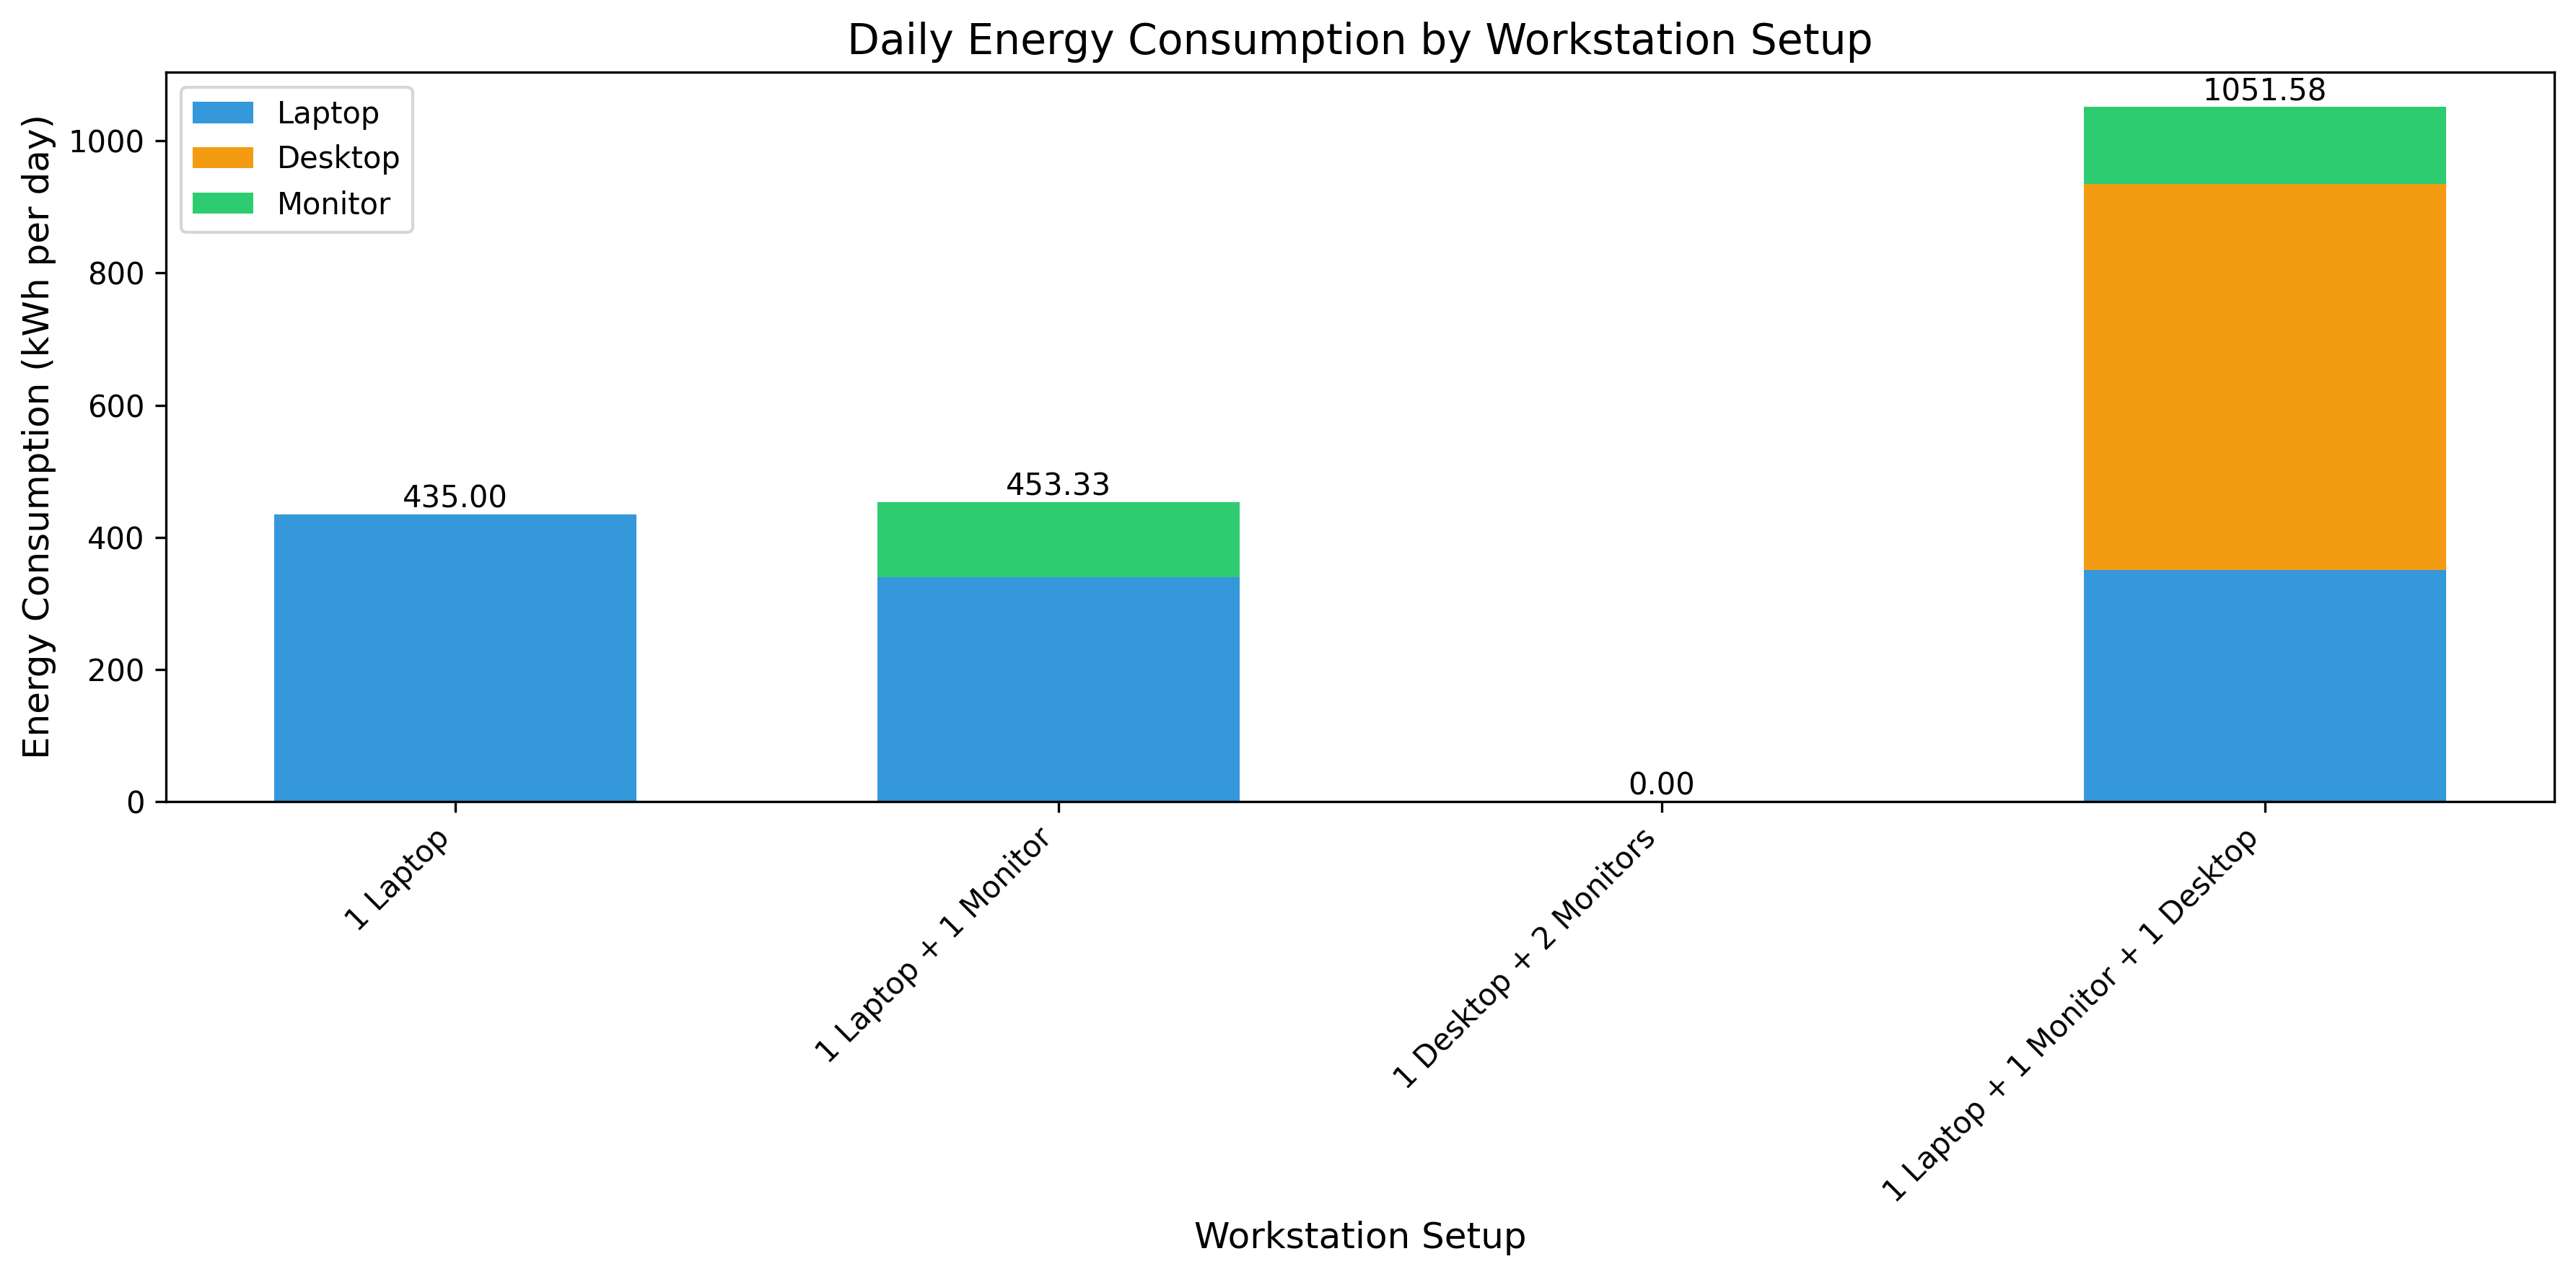

In [6]:
# Calculate daily energy consumption for each device type
survey_df['Desktop_Energy'] = survey_df['Desktops'] * 100 * survey_df['Active_Weekly_Hours'] / survey_df['Days_Per_Week']
survey_df['Laptop_Energy'] = survey_df['Laptops'] * 60 * survey_df['Active_Weekly_Hours'] / survey_df['Days_Per_Week']
survey_df['Monitor_Energy'] = survey_df['Monitors'] * 20 * survey_df['Active_Weekly_Hours'] / survey_df['Days_Per_Week']

# Define workstation setups
setups = ['1 Laptop', '1 Laptop + 1 Monitor', '1 Desktop + 2 Monitors', '1 Laptop + 1 Monitor + 1 Desktop']

# Calculate average energy consumption for each setup
setup_energy = {
    '1 Laptop': survey_df[(survey_df['Laptops'] == 1) & (survey_df['Monitors'] == 0) & (survey_df['Desktops'] == 0)][['Laptop_Energy', 'Desktop_Energy', 'Monitor_Energy']].mean(),
    '1 Laptop + 1 Monitor': survey_df[(survey_df['Laptops'] == 1) & (survey_df['Monitors'] == 1) & (survey_df['Desktops'] == 0)][['Laptop_Energy', 'Desktop_Energy', 'Monitor_Energy']].mean(),
    '1 Desktop + 2 Monitors': survey_df[(survey_df['Laptops'] == 0) & (survey_df['Monitors'] == 2) & (survey_df['Desktops'] == 1)][['Laptop_Energy', 'Desktop_Energy', 'Monitor_Energy']].mean(),
    '1 Laptop + 1 Monitor + 1 Desktop': survey_df[(survey_df['Laptops'] == 1) & (survey_df['Monitors'] == 1) & (survey_df['Desktops'] == 1)][['Laptop_Energy', 'Desktop_Energy', 'Monitor_Energy']].mean()
}

# Replace NaN values with 0
for key in setup_energy:
    setup_energy[key] = setup_energy[key].fillna(0)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.6
index = np.arange(len(setups))

bottom = np.zeros(len(setups))

colours = ['#3498db', '#f39c12', '#2ecc71']
for i, device in enumerate(['Laptop_Energy', 'Desktop_Energy', 'Monitor_Energy']):
    values = [setup_energy[setup][device] for setup in setups]
    ax.bar(index, values, bar_width, bottom=bottom, label=device.split('_')[0], color=colours[i])
    bottom += values

# Customise the chart
ax.set_xlabel('Workstation Setup', fontsize=12)
ax.set_ylabel('Energy Consumption (kWh per day)', fontsize=12)
ax.set_title('Daily Energy Consumption by Workstation Setup', fontsize=14, fontweight='normal')
ax.set_xticks(index)
ax.set_xticklabels(setups, rotation=45, ha='right')
ax.legend()

# Add value labels on the bars
for i, setup in enumerate(setups):
    total = sum(setup_energy[setup])
    ax.text(i, total, f'{total:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Key Insights into Workstations Energy Consumption

Desktops with multiple monitors use the most energy, while simpler laptop setups use less. For example, a setup with 1 Laptop + 1 Monitor + 1 Desktop consumes on average 1296 kWh per day, whereas a 1 Laptop setup consumes only 290 kWh per day. Optimising workstation configurations, especially minimising desktops and extra monitors, can significantly cut energy use.

---
<center>

### Lighting Energy Consumption
</center>

The survey captures details about the type of lighting employees use  and their habits regarding the energy efficiency of lighting systems.

#### Key Components:
- **Wattage Assignment**: Based on the type of lighting used (LEDs, Halogen, Tungsten), a dictionary (`wattage_dict`) assigns wattage values, which correspond to the typical energy consumption for each lighting type.

- **Usage Frequency**: A second dictionary (`light_on_dict`) maps survey responses regarding how frequently lights are used to a numeric scale (Always, Sometimes, Never).

- **Energy Calculations**:

  - **Daily Consumption**: Calculates the daily energy usage in watts and converts this to kilowatt-hours (kWh), taking into account the duration and frequency of lighting usage.
  
  - **Extended Period Calculations**: Extends these calculations to provide weekly, monthly, and yearly energy consumption estimates.

In [7]:
# Define the wattage based on the light type
wattage_dict = {'LEDs': 86, 'Halogen': 370, 'Tungsten': 516}

# Mapping from survey response to percentage
light_on_dict = {
    'Always': 1.0,  # 100% of the time
    'Sometimes': 0.5,  # 50% of the time
    'Never': 0.0  # 0% of the time
}

# Creating the 'Light_On_Percentage' column based on responses
survey_df['Light_On_Percentage'] = survey_df['Lights_On'].map(light_on_dict)

# Calculate the energy usage for lighting
survey_df['Daily_Watts_Used_Lighting'] = (
    survey_df['Light_Type'].map(wattage_dict) * survey_df['Hours_Per_Day'] * survey_df['Light_On_Percentage']
)
survey_df['Daily_kWh_Used_Lighting'] = survey_df['Daily_Watts_Used_Lighting'] / 1000  # converting Watts to kWh

# Calculate weekly and yearly energy usage for lighting
survey_df['Weekly_kWh_Used_Lighting'] = survey_df['Daily_kWh_Used_Lighting'] * survey_df['Days_Per_Week']
survey_df['Yearly_kWh_Used_Lighting'] = survey_df['Weekly_kWh_Used_Lighting'] * survey_df['Weeks_Per_Year']

# Calculate monthly energy usage using Weeks_Per_Year
survey_df['Monthly_kWh_Used_Lighting'] = survey_df['Yearly_kWh_Used_Lighting'] / 12

# Display the results
survey_df[['Respondent', 'Light_Type', 'Hours_Per_Day', 'Lights_On', 'Light_On_Percentage', 
           'Daily_Watts_Used_Lighting', 'Daily_kWh_Used_Lighting', 
           'Weekly_kWh_Used_Lighting', 'Monthly_kWh_Used_Lighting', 'Yearly_kWh_Used_Lighting']].head()


,Respondent,Light_Type,Hours_Per_Day,Lights_On,Light_On_Percentage,Daily_Watts_Used_Lighting,Daily_kWh_Used_Lighting,Weekly_kWh_Used_Lighting,Monthly_kWh_Used_Lighting,Yearly_kWh_Used_Lighting
0,1,LEDs,8,Sometimes,0.5,344.0,0.344,1.720,6.880000,82.560
1,2,LEDs,6,Sometimes,0.5,258.0,0.258,1.032,3.010000,36.120
2,3,LEDs,7,Always,1.0,602.0,0.602,1.806,6.772500,81.270
3,4,Halogen,8,Always,1.0,2960.0,2.960,8.880,29.600000,355.200
4,5,Halogen,7,Sometimes,0.5,1295.0,1.295,6.475,18.885417,226.625


### Light Types and Consumption Patterns

The  plots below provide insights into energy consumption patterns related to lighting in home office settings. The first plot shows the distribution of light types and usage patterns, highlighting opportunities for energy savings by switching to more efficient technologies and encouraging better usage habits. The second plot shows the average daily energy consumption for different combinations of light types and usage patterns, allowing for the identification of specific areas for improvement. Together, these plots can inform strategies to reduce energy consumption, leading to cost savings and a smaller environmental footprint.

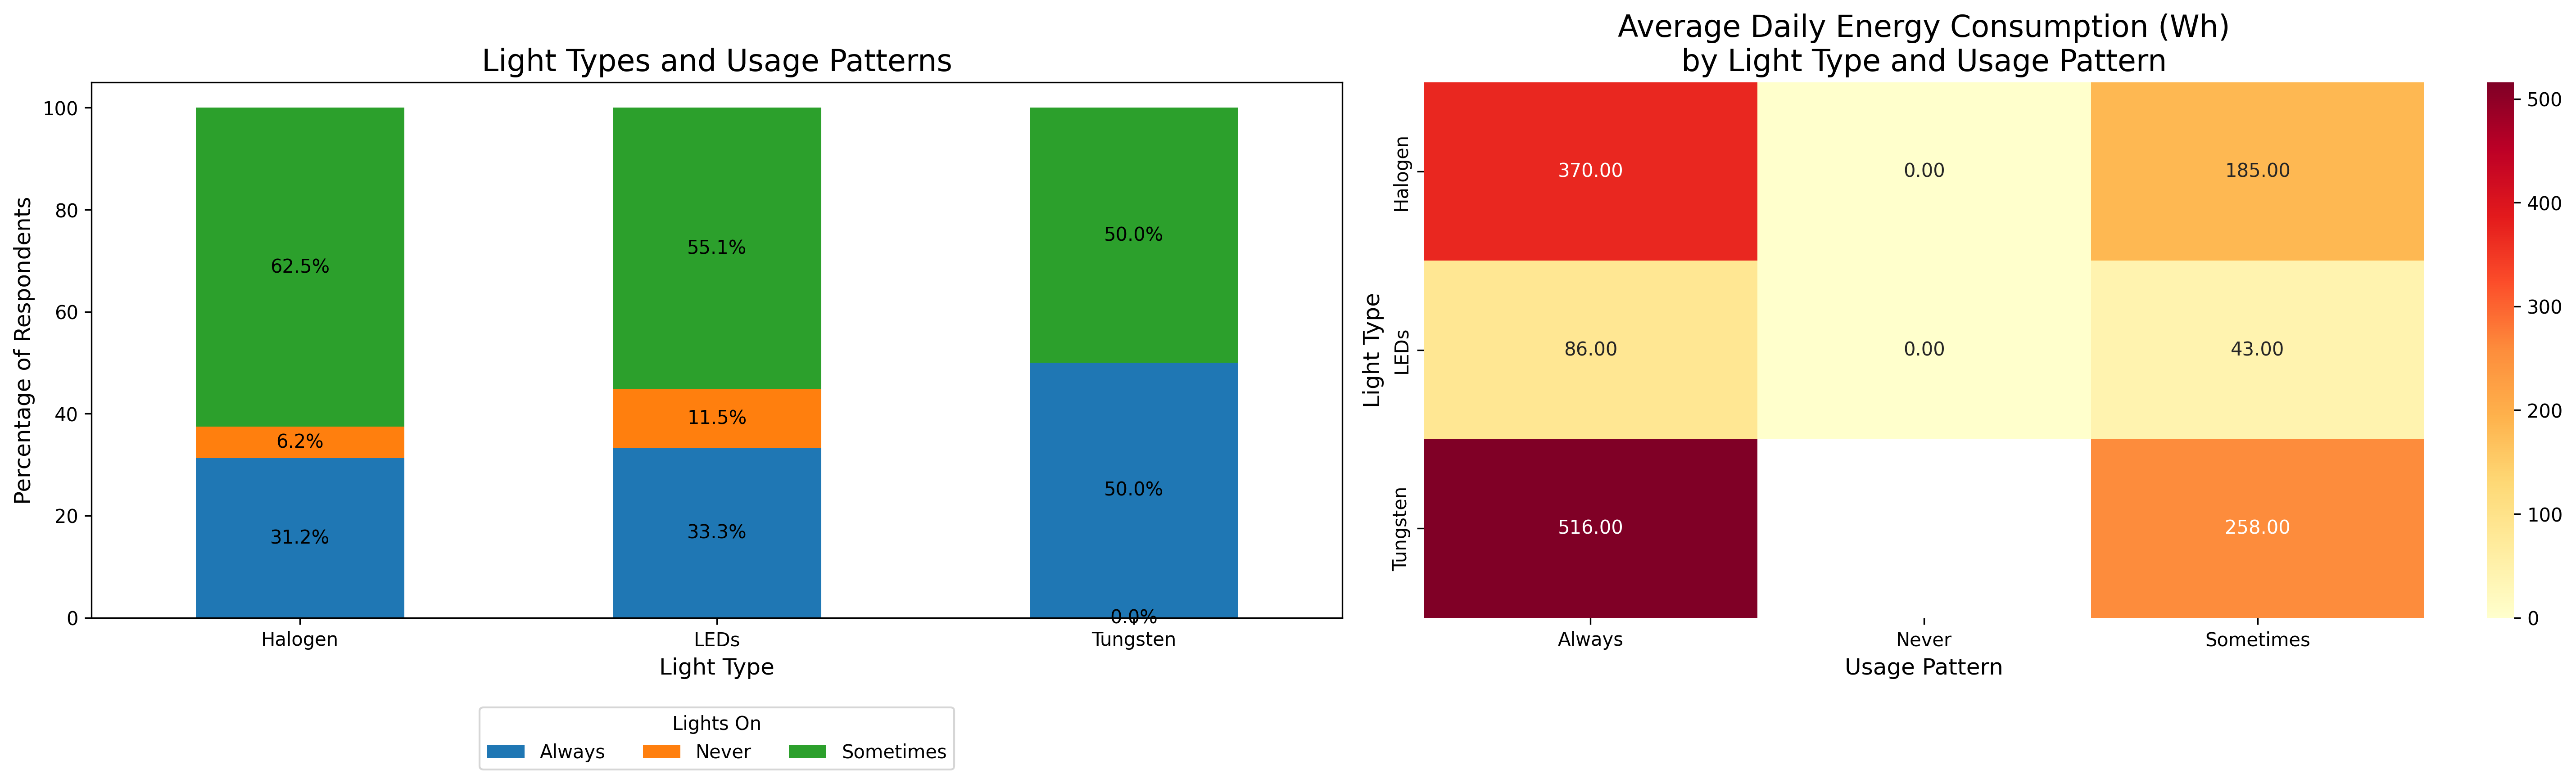

In [8]:
# Calculate percentages for stacked bar chart
light_data = survey_df.groupby(['Light_Type', 'Lights_On']).size().unstack(fill_value=0)
light_data_pct = light_data.div(light_data.sum(axis=1), axis=0) * 100

# Define energy consumption values and usage factors for heatmap
light_energy = {'LEDs': 86, 'Halogen': 370, 'Tungsten': 516}
usage_factor = {'Always': 1.0, 'Sometimes': 0.5, 'Never': 0.0}

# Calculate energy consumption
survey_df['Light_Energy'] = survey_df['Light_Type'].map(light_energy) * survey_df['Lights_On'].map(usage_factor)

# Create a pivot table for average energy consumption
energy_pivot = survey_df.pivot_table(values='Light_Energy', index='Light_Type', columns='Lights_On', aggfunc='mean')

# Create the combined figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Stacked bar chart
light_data_pct.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Light Types and Usage Patterns', fontsize=16)
ax1.set_xlabel('Light Type', fontsize=12)
ax1.set_ylabel('Percentage of Respondents', fontsize=12)
ax1.legend(title='Lights On', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

for c in ax1.containers:
    ax1.bar_label(c, fmt='%.1f%%', label_type='center')

# Heatmap
sns.heatmap(energy_pivot, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax2)
ax2.set_title('Average Daily Energy Consumption (Wh)\nby Light Type and Usage Pattern', fontsize=16)
ax2.set_xlabel('Usage Pattern', fontsize=12)
ax2.set_ylabel('Light Type', fontsize=12)

plt.tight_layout()
plt.show()

#### Key Insights into Light Types and Consumption Patterns

Many respondents use energy-efficient LEDs, but some still rely on halogen and tungsten lights, with varying usage habits. Switching from halogen to LEDs can cut energy use by about 77%, and switching from tungsten to LEDs can reduce it by roughly 83%. **Tungsten lights consume 516 Wh daily if left on**.

---
<center>

### Heating Energy Consumption from Gas and Electricity
</center>

The survey asks exactly how many additional hours per day, and months in the year heating has been on due to home working, so the final average energy intensity value ensures an accurate depiction of heating.

This script is designed to analyse heating energy consumption data collected through the survey, focusing on the amount of energy used in home offices. The code computes the daily, weekly, monthly, and yearly energy usage based on various parameters, such as the type of heating area and the actual working hours compared to heating hours.

#### Methodology
The function `calculate_heating_energy` performs the following operations:

- **Daily Energy Calculation**: Starts by estimating the daily energy usage by dividing the monthly kWh (provided in the survey) by 30. This is then adjusted to reflect actual working hours if they are less than the total heating hours per day, ensuring that the calculation reflects *real usage* rather than theoretical maximums. The formula for this calculation is:

  $$
  \boxed{\text{Daily Energy Usage (kWh)} = \frac{\text{Monthly kWh}}{30} \times \frac{\text{Actual Working Hours}}{\text{Total Heating Hours}}}
  $$

- **Area-Based Adjustments**: Modifies the daily energy consumption based on the heating area:
  - `Whole_House`: No adjustment.
  - `More_Than_One_Room`: Energy use is halved.
  - `One_Room`: Energy use is quartered.

  These adjustments provide a nuanced view of energy usage, reflecting the real impact of how much space is being heated.

- **Extended Period Calculations**: From the daily estimates, the function calculates weekly, monthly, and yearly energy consumption. Monthly calculations use the `Weeks_Per_Year` data for more accuracy, offering insights into seasonal and annual energy use trends. Then, it adds notes on the calculation process (e.g., if no additional heating is reported).

#### Energy Sources Included

It's important to note that this calculation includes energy consumption from multiple sources, specifically electricity, gas, and heat pumps. The `Heating_Monthly_kWh` variable, which forms the basis of our calculations, is populated for heating fuels that are measured in kWh, which includes electricity, gas, and heat pumps. This approach allows for a comprehensive assessment of heating energy consumption regardless of the primary energy source used for heating in the home office.

In [9]:
# Function to calculate heating energy consumption using Heating_Monthly_kWh
def calculate_heating_energy(row):
    if row['Additional_Heating'] == 'Yes':
        # Start calculation from daily energy usage
        daily_energy_kWh = row['Heating_Monthly_kWh'] / 30  # Assuming 30 days in a month

        # Adjust for actual work hours if less than heating hours
        if row['Heating_Hours_Per_Day'] > row['Hours_Per_Day']:
            daily_energy_kWh *= (row['Hours_Per_Day'] / row['Heating_Hours_Per_Day'])

        # Apply area-based adjustments to the calculation
        area_factor = 1.0
        if row['Heating_Area'] == 'Whole_House':
            area_factor = 1.0
        elif row['Heating_Area'] == 'More_Than_One_Room':
            area_factor = 0.5
        elif row['Heating_Area'] == 'One_Room':
            area_factor = 0.25

        daily_energy_kWh *= area_factor

        # Calculate weekly, monthly, and yearly energy usage
        weekly_energy_kWh = daily_energy_kWh * row['Days_Per_Week']
        monthly_energy_kWh = weekly_energy_kWh * (row['Weeks_Per_Year'] / 12)  # Use Weeks_Per_Year for accuracy
        yearly_energy_kWh = monthly_energy_kWh * row['Heating_Months_Per_Year']
        note = "None"
    else:
        daily_energy_kWh = weekly_energy_kWh = monthly_energy_kWh = yearly_energy_kWh = 0
        note = "No additional heating reported."

    return pd.Series([daily_energy_kWh, weekly_energy_kWh, monthly_energy_kWh, yearly_energy_kWh, note])

# Apply the function and expand the DataFrame
survey_df[['Daily_Heating_kWh', 'Weekly_Heating_kWh', 'Monthly_Heating_kWh', 'Yearly_Heating_kWh', 'Heating_Note']] = survey_df.apply(calculate_heating_energy, axis=1)

# Display the DataFrame with the new calculations
survey_df[['Respondent', 'Primary_Work_Location', 'Additional_Heating', 'Heating_Fuel', 'Heating_Area',
           'Daily_Heating_kWh', 'Weekly_Heating_kWh', 'Monthly_Heating_kWh', 'Yearly_Heating_kWh', 'Heating_Note']].tail()


,Respondent,Primary_Work_Location,Additional_Heating,Heating_Fuel,Heating_Area,Daily_Heating_kWh,Weekly_Heating_kWh,Monthly_Heating_kWh,Yearly_Heating_kWh,Heating_Note
95,96,UK,Yes,Gas,One_Room,9.792857,29.378571,117.514286,235.028571,None
96,97,Romania,Yes,Heat Pump,Whole_House,22.500000,112.500000,450.000000,450.000000,None
97,98,UK,Yes,Solid_Fuel_Coal,One_Room,0.000000,0.000000,0.000000,0.000000,None
98,99,UK,Yes,Gas,One_Room,13.925000,69.625000,174.062500,1044.375000,None
99,100,Romania,Yes,Other,More_Than_One_Room,0.000000,0.000000,0.000000,0.000000,None


---
<center>

### Heating Energy from Other Fuel Consumption
</center>

It's important to include fuel sources other than gas or electricity, such as oil, coal, or wood types because, despite the UK government's plan to phase out coal and wet wood for household heating ([Department for Environment, Food & Rural Affairs, 2020](https://www.gov.uk/government/news/government-takes-action-to-cut-pollution-from-household-burning)), many homes, particularly those outside the UK, may still rely on them.

We'll use data from the survey, which asks respondents to estimate how much fuel they use each month. We then apply conversion factors to convert the amount into kilowatt-hours (kWh) so we have the same unit to perform further analysis.

For respondents who report using oil and provide their consumption in litres, we need to convert this volume into metric tonnes. To do this accurately, we'll use the conversion factors from the [BP Statistical Review of World Energy](https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/pdfs/energy-economics/statistical-review/bp-stats-review-2022-approximate-conversion-factors.pdf) (BP, 2021). Here's the breakdown:

**Litres to Kilolitres:**

$$\text{Kilolitres} = \frac{\text{Litres}}{1000}$$

**Kilolitres to Barrels:**

$$\text{Barrels} = \text{Kilolitres} \times 6.2898$$

**Barrels to Metric Tonnes:**

$$\text{Metric Tonnes} = \text{Barrels} \times 0.1364$$

Combining these steps, the conversion from litres to metric tonnes is:

$$\text{Metric Tonnes} = \text{Litres} \times \left( \frac{1}{1000} \right) \times 6.2898 \times 0.1364 = 0.00085792872 \cdot \text{Litres}$$

Once we have the fuel amount in metric tonnes, we can convert it to kWh using the following conversion factors:

* **Oil:**

$$
\boxed{\text{Oil Energy (kWh)} = \text{Metric Tonnes} \times 41.570 \frac{\text{GJ}}{\text{tonne}} \times \frac{1 \ \text{kWh}}{3.6 \ \text{MJ}} = 11,630 \frac{\text{kWh}}{\text{tonne}} \times \text{Metric Tonnes}}
$$

   (Derived from the BP Statistical Review conversion factor of 41.570 GJ per tonne)

* **Solid Fuel - Coal:**

$$\boxed{\text{Coal Energy (kWh)} = \text{Kilograms} \times 0.123 \frac{\text{kWh}}{\text{kg coal}}}$$
   (Using the [European Nuclear Society's](https://www.euronuclear.org/glossary/coal-equivalent/) conversion factor of 0.123 kg coal equivalent per kWh)

* **Solid Fuel - Wood:**

$$
\boxed{\text{Wood Energy (kWh)} = \text{Cubic Metres} \times 2,520 \frac{\text{kWh}}{\text{m}^3}}
$$

   For the conversion of wood from kilograms to cubic meters, we use the average density provided by [FirewoodFund.co.uk, 2024](https://www.firewoodfund.co.uk/what-does-1-cubic-metre-of-firewood-look-like/). The average density (considering both hardwood and softwood) facilitates this calculation, allowing for more accurate and representative energy content estimations.

These conversion factors allow us to calculate the energy consumption in kWh for each type of fuel used by the respondents.

In [10]:
# Define the conversion factors in kWh per unit
conversion_factors_kWh = {
    'Oil': 11764.4,  # Conventional crude oil in kWh per metric ton (from IEA)
    'Solid_Fuel_Coal': 8.141,  # Coal in kWh per kg (from ENS)
    'Solid_Fuel_Wood': 2784,  # Average wood in kWh per cubic meter (estimated from ENS and density)
}

def calculate_adjusted_fuel_energy_kWh(row):
    fuel_type = row['Heating_Fuel']
    if fuel_type not in conversion_factors_kWh:
        return pd.Series([0, 0, 0, 0])  # Return 0s if fuel type is not in the dictionary

    amount_in_energy_unit = row['Heating_Fuel_Amount']  # Default in appropriate units

    if row['Heating_Fuel_Unit'] == 'Litres':
        # Convert litres to metric tonnes for oil
        amount_in_energy_unit = row['Heating_Fuel_Amount'] * 0.000858  # Conversion from litres to metric tonnes for oil

    elif row['Heating_Fuel_Unit'] == 'Kg' and fuel_type == 'Solid_Fuel_Coal':
        # Conversion already in kg for coal, no need to adjust
        pass

    elif row['Heating_Fuel_Unit'] == 'Kg' and fuel_type == 'Solid_Fuel_Wood':
        # Convert kg to cubic meters for wood using an average density
        average_density = (800 + 500) / 2  # Average of hardwood and softwood density
        amount_in_energy_unit = row['Heating_Fuel_Amount'] / average_density 

    # Calculate base energy in kWh
    daily_other_energy_kWh = amount_in_energy_unit * conversion_factors_kWh[fuel_type] / 30  # Daily energy use

    # Apply adjustments for usage
    if row['Heating_Hours_Per_Day'] > row['Hours_Per_Day']:
        daily_other_energy_kWh *= row['Hours_Per_Day'] / row['Heating_Hours_Per_Day']
    if row['Heating_Area'] == 'More_Than_One_Room':
        daily_other_energy_kWh *= 0.5
    elif row['Heating_Area'] == 'One_Room':
        daily_other_energy_kWh *= 0.25

    # Calculate weekly, monthly, and yearly energy usage
    weekly_other_energy_kWh = daily_other_energy_kWh * row['Days_Per_Week']
    monthly_other_energy_kWh = weekly_other_energy_kWh * (row['Weeks_Per_Year'] / 12)
    yearly_other_energy_kWh = monthly_other_energy_kWh * row['Heating_Months_Per_Year']

    return pd.Series([daily_other_energy_kWh, weekly_other_energy_kWh, monthly_other_energy_kWh, yearly_other_energy_kWh])

# Apply the function to the DataFrame
survey_df[['daily_other_energy_kWh', 'weekly_other_energy_kWh', 'monthly_other_energy_kWh', 'yearly_other_energy_kWh']] = survey_df.apply(
    lambda row: calculate_adjusted_fuel_energy_kWh(row) if row['Heating_Fuel'] not in ['Gas', 'Electricity'] else pd.Series([0, 0, 0, 0]), 
    axis=1
)

# Display the results
columns_to_display = [
    'Respondent', 'Heating_Fuel', 'Heating_Fuel_Unit', 'Heating_Fuel_Amount',
    'Heating_Area', 'Heating_Hours_Per_Day', 'Hours_Per_Day', 'Heating_Months_Per_Year',
    'daily_other_energy_kWh', 'weekly_other_energy_kWh', 'monthly_other_energy_kWh', 'yearly_other_energy_kWh', 'Yearly_Heating_kWh'
]
survey_df[columns_to_display].head()

,Respondent,Heating_Fuel,Heating_Fuel_Unit,Heating_Fuel_Amount,Heating_Area,Heating_Hours_Per_Day,Hours_Per_Day,Heating_Months_Per_Year,daily_other_energy_kWh,weekly_other_energy_kWh,monthly_other_energy_kWh,yearly_other_energy_kWh,Yearly_Heating_kWh
0,1,Gas,kWh,0,One_Room,8,8,5,0.000000,0.0000,0.000000,0.000000,1125.000000
1,2,None,None,0,None,0,6,0,0.000000,0.0000,0.000000,0.000000,0.000000
2,3,Solid_Fuel_Coal,Kg,500,One_Room,3,7,1,33.920833,101.7625,381.609375,381.609375,0.000000
3,4,Electricity,kWh,0,One_Room,1,8,3,0.000000,0.0000,0.000000,0.000000,288.750000
4,5,Gas,kWh,0,One_Room,8,7,2,0.000000,0.0000,0.000000,0.000000,388.554688


---
<center>

### Cooling Energy Usage
</center>

The methodology for calculating the energy use for cooling is partially covered in [EcoActs' white paper](https://info.eco-act.com/en/homeworking-emissions-whitepaper-2020?_gl=1), where averages are suggested. The [Green Element's](https://www.greenelement.co.uk/environmental-and-sustainability-ebooks/working-from-home-emissions/) research paper does not address it at all. Therefore, we have followed a similar approach with the heating calculation, leveraging the survey to pose a few more questions to gather estimates and providing guidance to the respondents.

This script is designed to calculate the energy consumption associated with cooling devices used in home offices, factoring in the specific months of operation and daily usage hours as reported in the survey.

#### Methodology
The function `calculate_cooling_energy` processes each respondent's data to compute cooling energy usage as follows:

- **Daily Cooling kWh Calculation**: Initially calculates the average daily energy consumption from the monthly kWh data, considering the total number of days cooling is used based on `Cooling_Months_Per_Year`.
  
- **Adjustments for Actual Work Hours**: The daily cooling kWh is then adjusted to account only for the hours when the respondent is actually working:
  - If cooling operates for as many or more hours than the workday length, the energy used while working is proportionally adjusted.
  - If cooling operates for fewer hours than the workday, it is assumed that cooling is needed for its entire operation during working hours.

- **Extended Period Calculations**: Additionally calculates weekly, monthly, and yearly energy usage. The monthly calculation specifically uses the `Weeks_Per_Year` for more precise conversion from weekly figures, reflecting more accurate seasonal energy consumption.

In [11]:
# Function to calculate energy usage for cooling considering only the active months and actual operational hours
def calculate_cooling_energy(row):
    # Calculate the total number of cooling days
    total_cooling_days = row['Cooling_Months_Per_Year'] * 30  # Assuming 30 days per month

    # Calculate Daily Cooling kWh based on monthly consumption and total cooling days
    daily_cooling_kWh = (row['Cooling_Monthly_kWh'] / 30) * (row['Cooling_Hours_Per_Day'] / 24)

    # Calculate Daily Cooling kWh during work hours
    if row['Cooling_Hours_Per_Day'] >= row['Hours_Per_Day']:
        # If cooling hours per day are equal to or greater than work hours
        cooling_kWh_while_working = daily_cooling_kWh * (row['Hours_Per_Day'] / row['Cooling_Hours_Per_Day'])
    else:
        # If cooling hours per day are less than work hours
        cooling_kWh_while_working = daily_cooling_kWh  # Since cooling is required throughout its operation

    # Calculate Weekly, Monthly, and Yearly Cooling kWh for completeness
    weekly_cooling_kWh = daily_cooling_kWh * row['Days_Per_Week']
    monthly_cooling_kWh = weekly_cooling_kWh * (row['Weeks_Per_Year'] / 12)  # Use Weeks_Per_Year for accuracy
    yearly_cooling_kWh = monthly_cooling_kWh * row['Cooling_Months_Per_Year']

    return pd.Series([daily_cooling_kWh, weekly_cooling_kWh, monthly_cooling_kWh, yearly_cooling_kWh, cooling_kWh_while_working])

# Apply the function to each row in the DataFrame
survey_df[['Daily_Cooling_kWh', 'Weekly_Cooling_kWh', 'Monthly_Cooling_kWh', 'Yearly_Cooling_kWh', 'Cooling_kWh_While_Working']] = survey_df.apply(calculate_cooling_energy, axis=1)

# Display the DataFrame with the new calculations
survey_df[['Respondent', 'Use_Cooling', 'Cooling_Type', 'Cooling_Monthly_kWh', 'Cooling_Hours_Per_Day', 'Cooling_Months_Per_Year', 'Hours_Per_Day',
           'Daily_Cooling_kWh', 'Weekly_Cooling_kWh', 'Monthly_Cooling_kWh', 'Yearly_Cooling_kWh']].head()

,Respondent,Use_Cooling,Cooling_Type,Cooling_Monthly_kWh,Cooling_Hours_Per_Day,Cooling_Months_Per_Year,Hours_Per_Day,Daily_Cooling_kWh,Weekly_Cooling_kWh,Monthly_Cooling_kWh,Yearly_Cooling_kWh
0,1,Yes,Central_AC,846,6,3,8,7.05,35.25,141.0,423.0
1,2,No,None,0,0,0,6,0.00,0.00,0.0,0.0
2,3,No,None,0,0,0,7,0.00,0.00,0.0,0.0
3,4,No,None,0,0,0,8,0.00,0.00,0.0,0.0
4,5,No,None,0,0,0,7,0.00,0.00,0.0,0.0


#### Note: Differences in Heating and Cooling Energy Calculations
- **Cooling**: Energy usage is typically time-sensitive, operating during specific hours of the day. Dividing by 24 normalises energy use across a full day, reflecting partial daily operation.
- **Heating**: Systems often run continuously or for extended periods to maintain temperature, making adjustments based on work hours (`Hours_Per_Day`) more relevant. Dividing by 24 would dilute the calculation, as heating is less restricted to specific hours.

### Average Distribution of Annual Energy Consumption in Home Office Settings

The following chart helps us understand how different energy uses contribute to the overall consumption in a typical home office setting. This understanding can then be used to identify the areas where energy consumption can be reduced, leading to cost savings and a smaller environmental footprint.

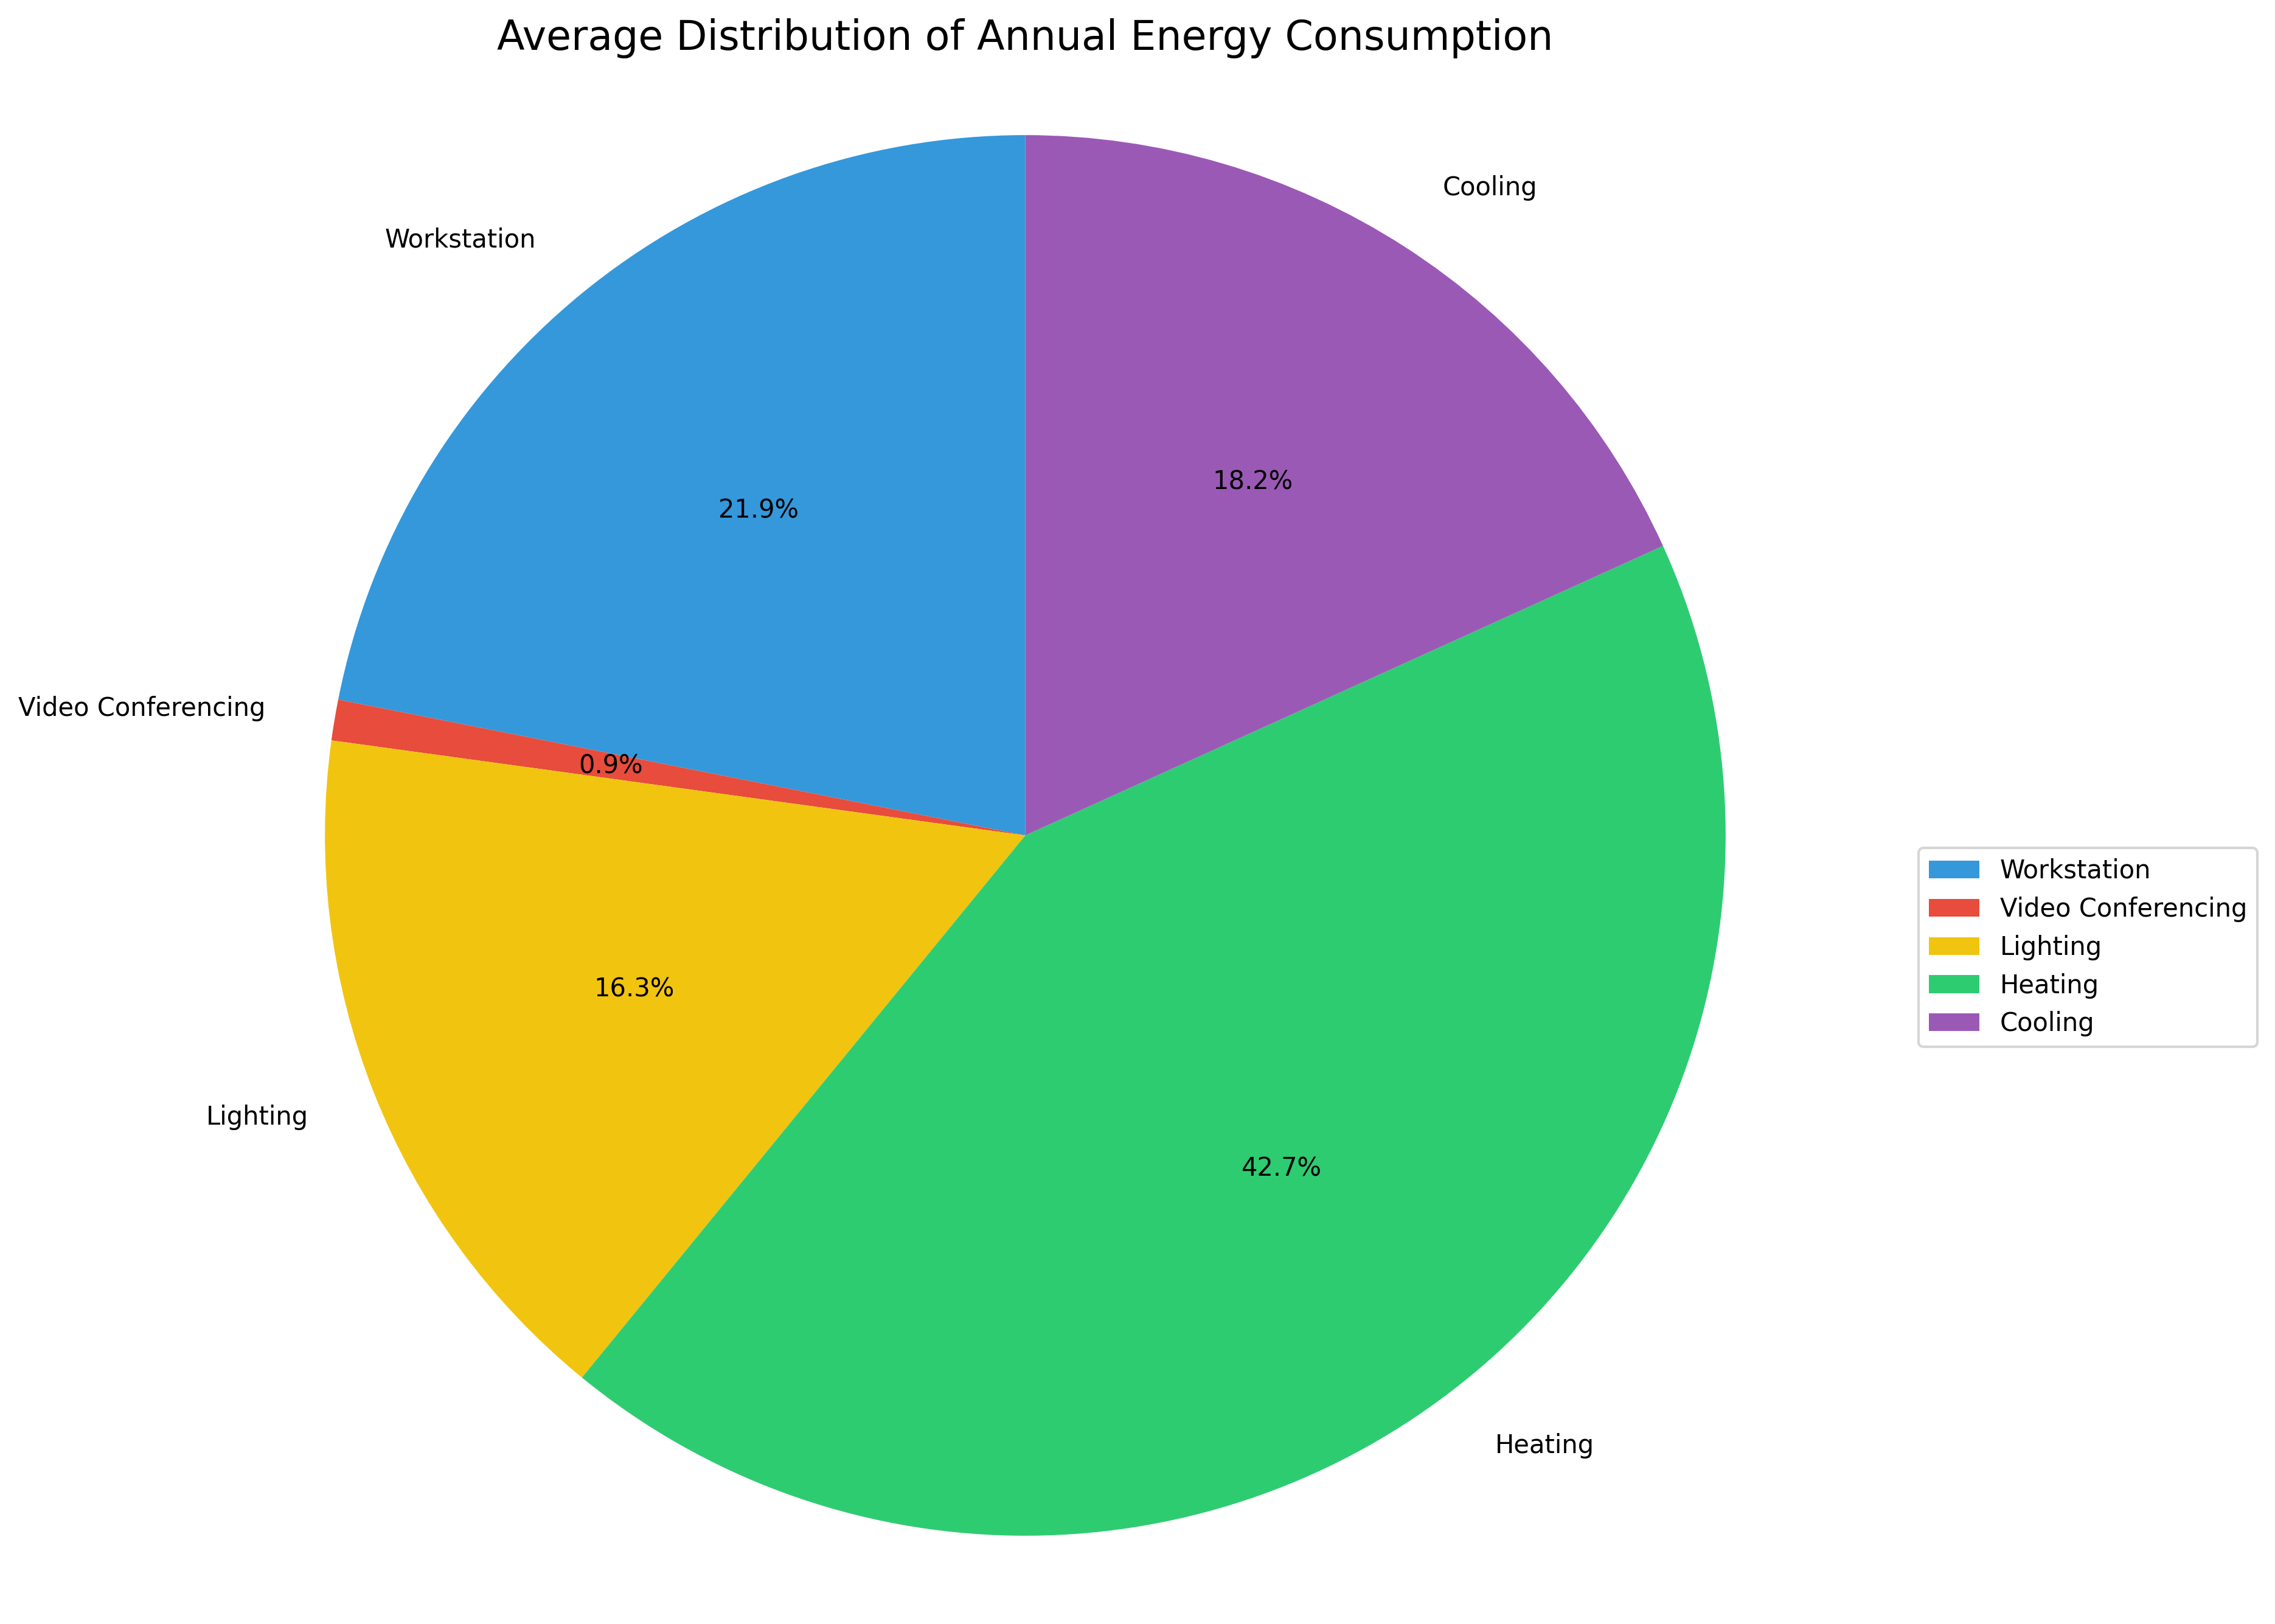

In [12]:
# Calculate annual energy consumption for each category
annual_workstation = survey_df['Adjusted_Total_Year_kWh_Used_Workstation'].mean()
annual_video = (survey_df['Adjusted_Weekly_Video_Call_Energy_kWh'] * survey_df['Weeks_Per_Year']).mean()
annual_lighting = survey_df['Yearly_kWh_Used_Lighting'].mean()
annual_heating = survey_df['Yearly_Heating_kWh'].mean()
annual_cooling = survey_df['Yearly_Cooling_kWh'].mean()

# Prepare data for the pie chart
categories = ['Workstation', 'Video Conferencing', 'Lighting', 'Heating', 'Cooling']
values = [annual_workstation, annual_video, annual_lighting, annual_heating, annual_cooling]

# Define a custom color palette
colors = ['#3498db', '#e74c3c', '#f1c40f', '#2ecc71', '#9b59b6']

# Create the pie chart
plt.figure(figsize=(12, 9))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors, shadow=False)
plt.title('Average Distribution of Annual Energy Consumption', fontsize=16, fontweight='normal')
plt.axis('equal')

# Add a legend
plt.legend(categories, loc="best", bbox_to_anchor=(1, 0.5))

# Display the chart
plt.tight_layout()
plt.show()


#### Key Insights into Home Office Energy Use

Our analysis indicates that heating is the largest energy consumer in home offices, accounting for 61.1% of total consumption. Workstations follow in second place at 17.5%, with lighting at 13.9%, cooling at 6.9%, and video calls at 0.7%. This underscores the potential for significant energy savings by enhancing insulation, upgrading heating systems, and improving the energy efficiency of our workstations.

---
<center>

### Total Electricity Consumption
</center>
We filter survey data to focus on electric-based heating systems, and calculate the total yearly electric energy consumption for heating, cooling, lighting, and workstations. The total electric energy used is then summed up.

In [13]:
# Filter for electric-based heating
electric_heating_df = survey_df[survey_df['Heating_Fuel'].isin(['Electricity', 'Heat Pump', 'Other'])]

# Calculate total electric energy for heating, cooling, lighting, and workstations
total_electric_heating_kWh = electric_heating_df['Yearly_Heating_kWh'].sum()
total_electric_cooling_kWh = survey_df['Yearly_Cooling_kWh'].sum()  # Assuming all cooling is electric
total_electric_lighting_kWh = survey_df['Yearly_kWh_Used_Lighting'].sum()
total_electric_workstation_kWh = survey_df['Adjusted_Total_Year_kWh_Used_Workstation'].sum()

# Sum of all electric energy used
total_electric_energy_kWh = (
    total_electric_heating_kWh +
    total_electric_cooling_kWh +
    total_electric_lighting_kWh +
    total_electric_workstation_kWh
)

print("--- Breakdown of Total Electric Energy Consumption ---")
print(f"{'Component':<25} | {'Energy (kWh)':>15}")
print("-" * 43)
print(f"{'Workstation & Devices':<25} | {total_electric_workstation_kWh:>15.2f}")
print(f"{'Lighting':<25} | {total_electric_lighting_kWh:>15.2f}")
print(f"{'Heating (Electric)':<25} | {total_electric_heating_kWh:>15.2f}")
print(f"{'Cooling':<25} | {total_electric_cooling_kWh:>15.2f}")
print("-" * 43)
print(f"{'TOTAL ELECTRIC ENERGY':<25} | {total_electric_energy_kWh:>15.2f}")
print("-" * 43)

--- Breakdown of Total Electric Energy Consumption ---
Component                 |    Energy (kWh)
-------------------------------------------
Workstation & Devices     |        13863.62
Lighting                  |        10294.73
Heating (Electric)        |        16251.39
Cooling                   |        11535.55
-------------------------------------------
TOTAL ELECTRIC ENERGY     |        51945.30
-------------------------------------------


<center>

### Renewable Energy and Dual Reporting
</center>

Q11 in the survey is essential for identifying the type of energy source used by respondents, enabling accurate emissions reporting in line with the GHG Protocol’s **dual reporting** recommendations. This includes:

- **Location-based reporting**, which applies the average grid electricity mix of the respondent's country for calculations.
- **Market-based reporting**, which uses the actual fuel mix or energy tariff the respondent utilises.

This question ensures that emissions calculations account for domestic renewable energy tariffs globally. It is a simple multiple-choice question (Yes, No, Don’t Know). A ‘No’ or ‘Don’t Know’ response assumes the respondent uses the national average grid electricity mix, while a ‘Yes’ response applies a zero carbon factor for a 100% renewable energy supply.

In [14]:
# Filter for respondents with renewable energy AND electric-based heating
renewable_energy_df = survey_df[
    (survey_df['Renewable_Energy'] == 'Yes') &
    (survey_df['Heating_Fuel'].isin(['Electricity', 'Heat Pump', 'Other']))
]

# Calculate total electric energy for heating, cooling, lighting, and workstations for this group
total_electric_heating_kWh_renewable = renewable_energy_df['Yearly_Heating_kWh'].sum()
total_electric_cooling_kWh_renewable = renewable_energy_df['Yearly_Cooling_kWh'].sum()
total_electric_lighting_kWh_renewable = renewable_energy_df['Yearly_kWh_Used_Lighting'].sum()
total_electric_workstation_kWh_renewable = renewable_energy_df['Adjusted_Total_Year_kWh_Used_Workstation'].sum()

# Sum of all electric energy used by this group
total_electric_energy_kWh_renewable = (
    total_electric_heating_kWh_renewable +
    total_electric_cooling_kWh_renewable +
    total_electric_lighting_kWh_renewable +
    total_electric_workstation_kWh_renewable
)

print("--- Breakdown for Users with Renewable Tariffs & Electric Heating ---")
print(f"{'Component':<25} | {'Energy (kWh)':>15}")
print("-" * 43)
print(f"{'Workstation & Devices':<25} | {total_electric_workstation_kWh_renewable:>15.2f}")
print(f"{'Lighting':<25} | {total_electric_lighting_kWh_renewable:>15.2f}")
print(f"{'Heating (Electric)':<25} | {total_electric_heating_kWh_renewable:>15.2f}")
print(f"{'Cooling':<25} | {total_electric_cooling_kWh_renewable:>15.2f}")
print("-" * 43)
print(f"{'TOTAL RENEWABLE ENERGY':<25} | {total_electric_energy_kWh_renewable:>15.2f}")
print("-" * 43)

--- Breakdown for Users with Renewable Tariffs & Electric Heating ---
Component                 |    Energy (kWh)
-------------------------------------------
Workstation & Devices     |         2075.98
Lighting                  |         1704.30
Heating (Electric)        |         9705.29
Cooling                   |         1865.36
-------------------------------------------
TOTAL RENEWABLE ENERGY    |        15350.93
-------------------------------------------


<center>

### Net Electricity Consumption After Deducting Renewable Energy
</center>

We calculate the net electricity consumption by deducting the total renewable energy usage from the total electric energy consumption. This helps in understanding the actual non-renewable electricity consumption, which is crucial for accurate emissions reporting and sustainability assessments.


In [15]:
# Deduct renewable energy from the total electric energy
net_electric_energy_kWh = total_electric_energy_kWh - total_electric_energy_kWh_renewable

print("--- Calculation of Net Grid Energy Consumption ---")
print(f"{'Description':<35} | {'Energy (kWh)':>15}")
print("-" * 53)
print(f"{'Total Electric Energy (All Sources)':<35} | {total_electric_energy_kWh:>15.2f}")
print(f"{'(-) Energy from Renewable Tariffs':<35} | {total_electric_energy_kWh_renewable:>15.2f}")
print("-" * 53)
print(f"{'(=) Net Grid Energy Consumption':<35} | {net_electric_energy_kWh:>15.2f}")
print("-" * 53)

--- Calculation of Net Grid Energy Consumption ---
Description                         |    Energy (kWh)
-----------------------------------------------------
Total Electric Energy (All Sources) |        51945.30
(-) Energy from Renewable Tariffs   |        15350.93
-----------------------------------------------------
(=) Net Grid Energy Consumption     |        36594.36
-----------------------------------------------------


### Energy Consumption Comparison: Renewable vs Non-Renewable Energy Users

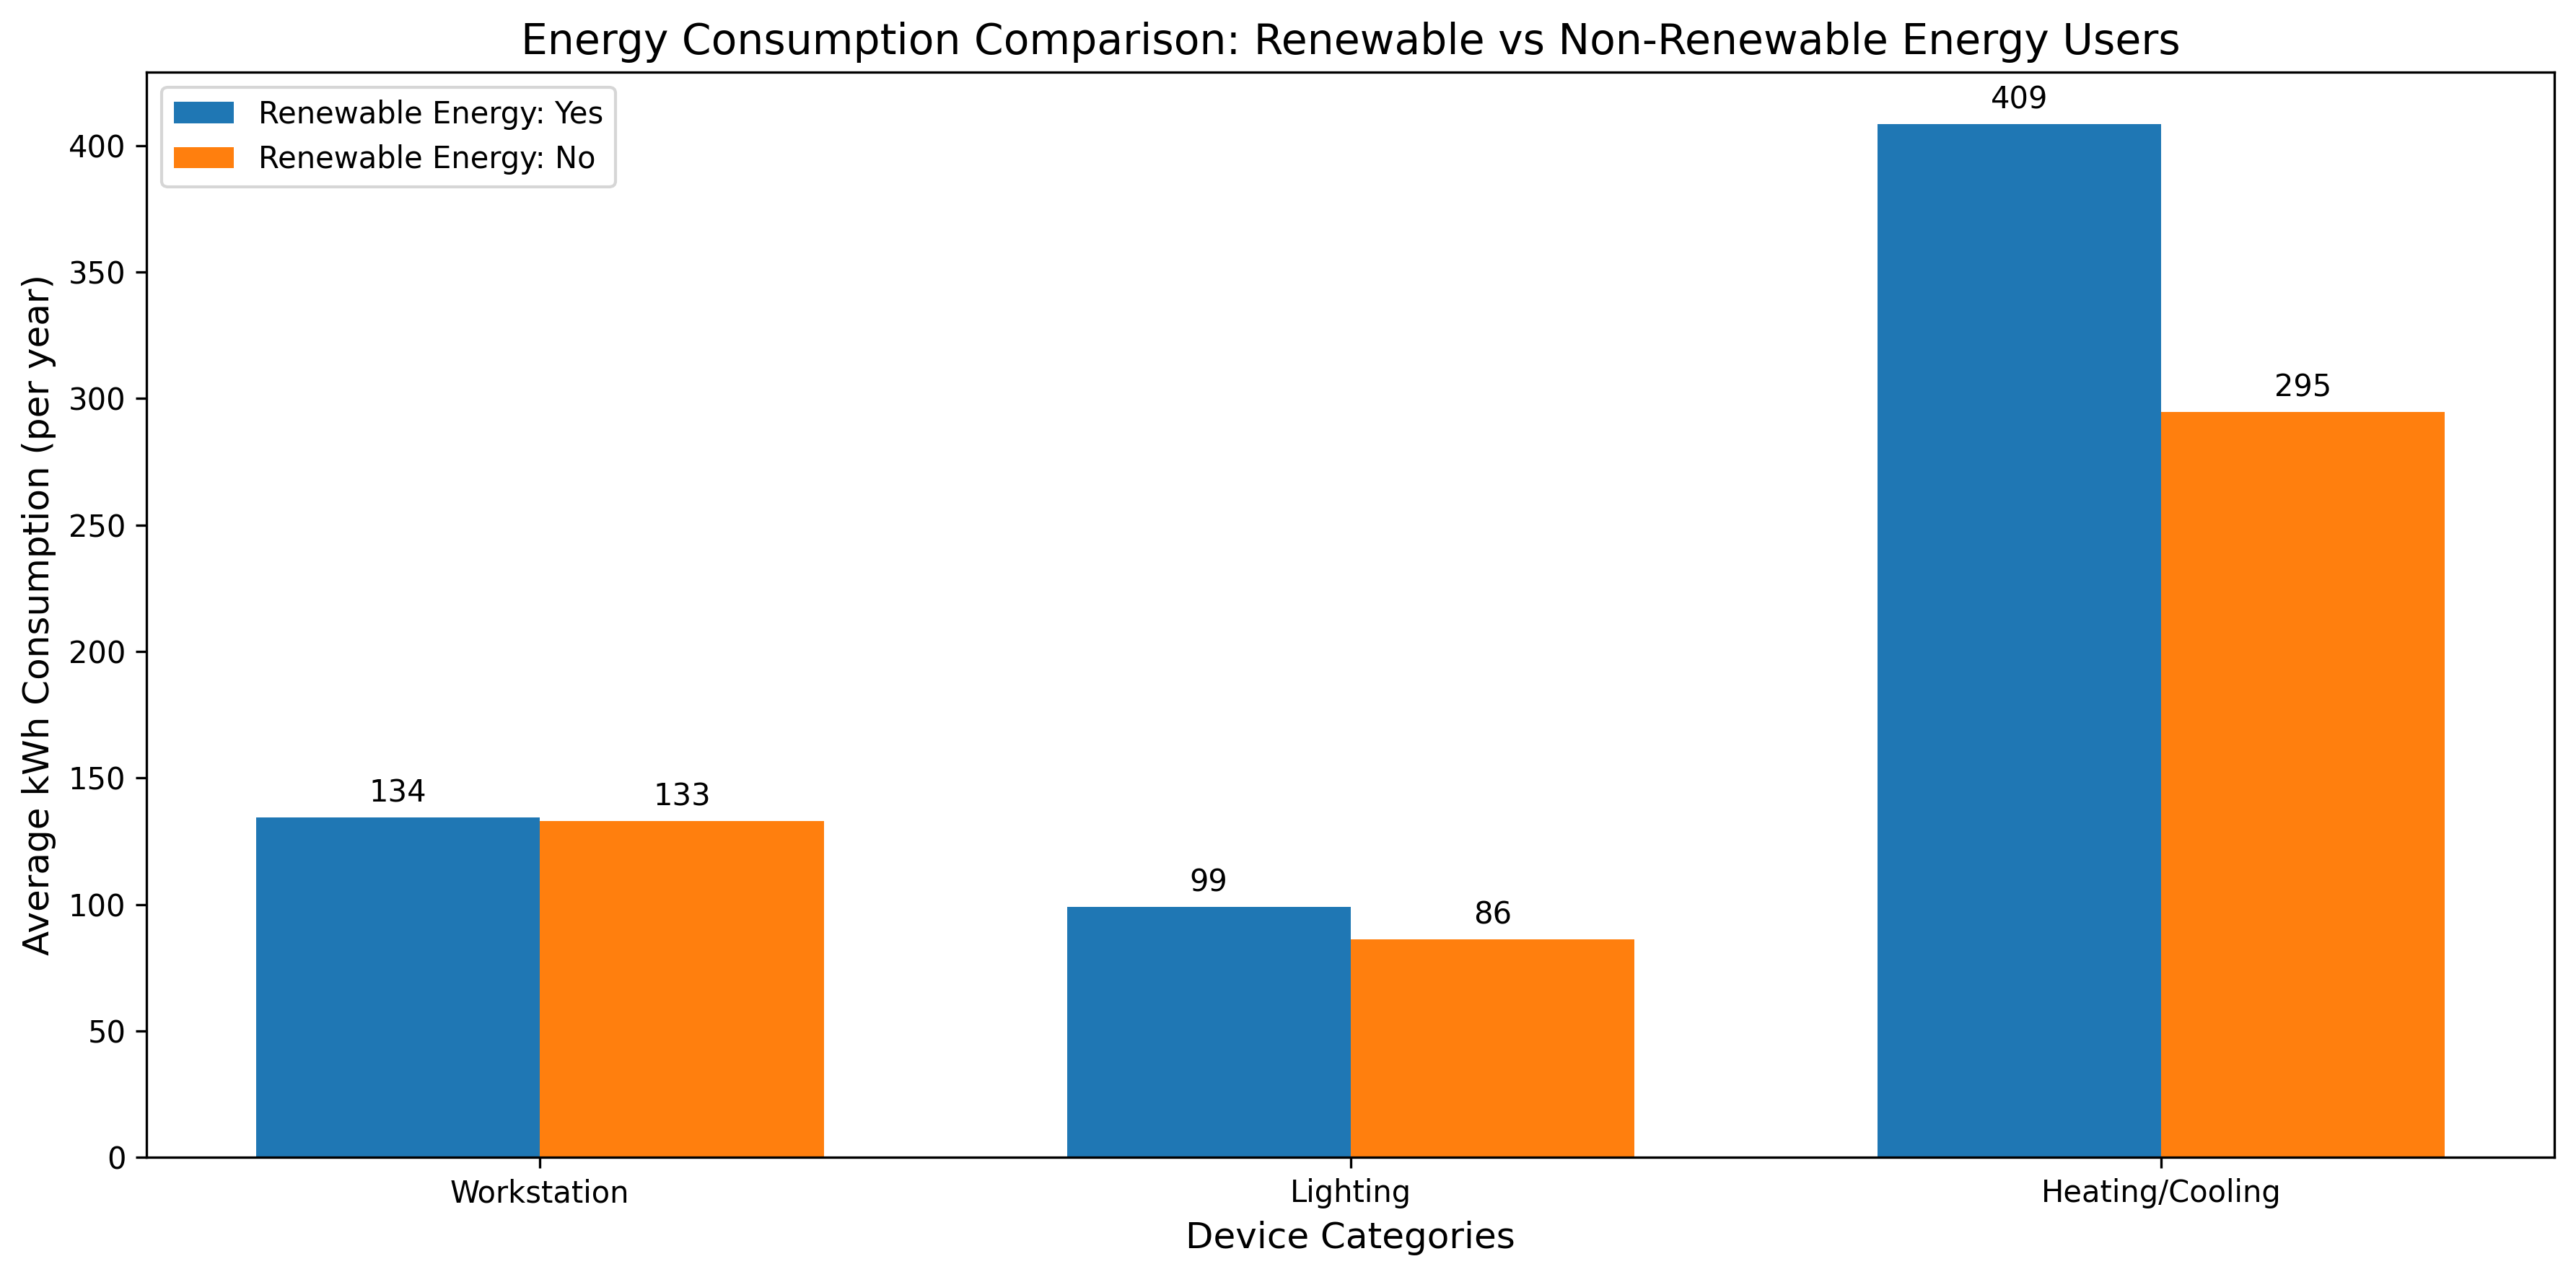

In [16]:
# Calculate average energy consumption for each category and renewable energy status
renewable_yes = survey_df[survey_df['Renewable_Energy'] == 'Yes']
renewable_no = survey_df[survey_df['Renewable_Energy'] == 'No']

categories = ['Workstation', 'Lighting', 'Heating/Cooling']
renewable_yes_avg = [
    renewable_yes['Adjusted_Total_Year_kWh_Used_Workstation'].mean(),
    renewable_yes['Yearly_kWh_Used_Lighting'].mean(),
    renewable_yes['Yearly_Heating_kWh'].mean() + renewable_yes['Yearly_Cooling_kWh'].mean()
]
renewable_no_avg = [
    renewable_no['Adjusted_Total_Year_kWh_Used_Workstation'].mean(),
    renewable_no['Yearly_kWh_Used_Lighting'].mean(),
    renewable_no['Yearly_Heating_kWh'].mean() + renewable_no['Yearly_Cooling_kWh'].mean()
]

# Set up the bar chart
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, renewable_yes_avg, width, label='Renewable Energy: Yes', color='#1f77b4')  # Blue
rects2 = ax.bar(x + width/2, renewable_no_avg, width, label='Renewable Energy: No', color='#ff7f0e')  # Orange

# Customise the chart
ax.set_ylabel('Average kWh Consumption (per year)', fontsize=12)
ax.set_xlabel('Device Categories', fontsize=12)
ax.set_title('Energy Consumption Comparison: Renewable vs Non-Renewable Energy Users', fontsize=14, fontweight='normal')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add value labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

#### Key Insights into Renewable vs Non-Renewable Energy Users

On average, employees who use renewable energy tend to consume less energy in workstations, lighting, and heating/cooling. This suggests that those using renewable energy are more conscious of their energy footprint or have invested in more energy-efficient appliances. However, the specific savings vary by category, highlighting areas where further efficiency improvements can be made, regardless of the energy source.

---
<center>

### CO2 Emissions from Electricity Usage
</center>

To calculate emissions from electricity usage, we multiply the total energy consumed by the appropriate emissions factor, which represents the average emissions for a specific country's grid, which aligns with the location-based methodology outlined by [EcoAct](https://info.eco-act.com/en/homeworking-emissions-whitepaper-2020?_gl=1).

The carbon emissions per kWh of electricity vary depending on the fuel sources used by each country. Countries heavily reliant on fossil fuels generally have higher emissions per unit of electricity than those using more renewable sources like hydroelectric (Albania and Ethiopia source almost their entire electricity from hydroelectric power, for example) and nuclear energy ([CaDI](https://www.carbondi.com), 2024).

[Carbon Footprint Ltd](https://www.carbonfootprint.com) publishes open-source emissions factors that can be used for company reporting. These factors are integrated into the carbon calculator tools available on their website.

Here's a table showing emission factors for the countries where our staff is based in from 2019 to 2024:

<center>

| Country          | 2024     | 2023     | 2022     | 2021     | 2020     | 2019     |
|------------------|----------|----------|----------|----------|----------|----------|
| Albania          | 0.00000  | 0.00000  | 0.00000  | 0.00000  | 0.00000  | 0.00000  |
| Bolivia          | 0.33792  | 0.32488  | 0.32927  | 0.31776  | 0.35104  | 0.37595  |
| Colombia         | 0.19177  | 0.17039  | 0.25623  | 0.21326  | 0.15479  | 0.13064  |
| Denmark          | 1.10112  | 0.52101  | 0.38344  | 0.45114  | 0.68332  | 0.50190  |
| Egypt            | 0.47401  | 0.46441  | 0.45597  | 0.45818  | 0.47830  | 0.49429  |
| Ethiopia         | 0.00056  | 0.00056  | 0.00054  | 0.00060  | 0.00009  | 0.00007  |
| India            | 0.93739  | 0.94144  | 0.93344  | 0.94703  | 0.96435  | 0.93518  |
| Italy            | 0.57500  | 0.39889  | 0.40244  | 0.40222  | 0.41460  | 0.47499  |
| Macedonia        | 0.62751  | 0.55400  | 0.61209  | 0.68254  | 0.57188  | 0.65935  |
| Netherlands      | 0.48595  | 0.50301  | 0.41555  | 0.49032  | 0.56291  | 0.54596  |
| Nigeria          | 0.40311  | 0.39948  | 0.39756  | 0.37031  | 0.38245  | 0.37749  |
| Pakistan         | 0.43251  | 0.44840  | 0.46078  | 0.44139  | 0.42199  | 0.44195  |
| Philippines      | 0.69989  | 0.68630  | 0.69112  | 0.67390  | 0.64187  | 0.60962  |
| Portugal         | 0.97292  | 0.50552  | 0.32462  | 0.44115  | 0.29353  | 0.34721  |
| Romania          | 0.27834  | 0.27555  | 0.26455  | 0.31356  | 0.32610  | 0.33758  |
| Spain            | 0.41985  | 0.27017  | 0.32286  | 0.35238  | 0.39831  | 0.44597  |
| Turkey           | 0.45014  | 0.44141  | 0.42918  | 0.43140  | 0.46770  | 0.44091  |
| UK               | 0.41655  | 0.35454  | 0.30340  | 0.33455  | 0.34941  | 0.34598  |
</center>

**Note:** Emission factors for grid-supplied electricity can be obtained through APIs from providers like [Climatiq](https://www.climatiq.io/data/activity/), which offers embedded carbon intelligence software for automated GHG emission calculations based on verified scientific models. Their suite includes an open dataset of emission factors and intelligent APIs that integrate with existing software for automated GHG emission calculations based on verified scientific models.

In [17]:
# Emission factors (kg CO2/kWh) for each country in 2024
emission_factors = {
    'Albania': 0.00000,
    'Bolivia': 0.33792,
    'Colombia': 0.19177,
    'Denmark': 1.10112,
    'Egypt': 0.47401,
    'Ethiopia': 0.00056,
    'India': 0.93739,
    'Italy': 0.57500,
    'Macedonia': 0.62751,
    'Netherlands': 0.48595,
    'Nigeria': 0.40311,
    'Pakistan': 0.43251,
    'Philippines': 0.69989,
    'Portugal': 0.97292,
    'Romania': 0.27834,
    'Spain': 0.41985,
    'Turkey': 0.45014,
    'UK': 0.41655
}

# Calculate total electricity consumption for each respondent
survey_df['Total_Electricity_Consumption_kWh'] = (  # type: ignore
    survey_df['Yearly_Heating_kWh'] +
    survey_df['Yearly_Cooling_kWh'] +
    survey_df['Yearly_kWh_Used_Lighting'] +
    survey_df['Adjusted_Total_Year_kWh_Used_Workstation']
)

# Function to calculate emissions based on country and renewable energy status
def calculate_emissions(row):
    if row['Renewable_Energy'] == 'Yes':
        # No emissions for renewable energy users
        return 0
    else:
        # Calculate emissions based on country-specific emission factors
        country = row['Primary_Work_Location']  # Use the correct column name
        return row['Total_Electricity_Consumption_kWh'] * emission_factors[country]

# Apply function to calculate emissions
survey_df['Electricity_CO2_Emissions_kg'] = survey_df.apply(calculate_emissions, axis=1)  # type: ignore

# Display the results
survey_df[['Respondent', 'Primary_Work_Location', 'Total_Electricity_Consumption_kWh', 'Renewable_Energy', 'Electricity_CO2_Emissions_kg']].head()  # type: ignore

,Respondent,Primary_Work_Location,Total_Electricity_Consumption_kWh,Renewable_Energy,Electricity_CO2_Emissions_kg
0,1,Colombia,1779.696000,No,341.292302
1,2,India,157.108000,Yes,0.000000
2,3,UK,173.835000,Yes,0.000000
3,4,UK,716.806000,Yes,0.000000
4,5,UK,729.678688,Don't Know,303.947657


<center>

### World Resources Institute (WRI) GHG Emission Factors Compilation
</center>

This table contains a compilation of emission factors (EFs) for CO2, which are 'cross-sector'; that is, they can be used by reporting entities from any sector, such as the manufacturing, energy or institutional ([GHG Protocol, 2024](https://ghgprotocol.org/sites/default/files/2024-05/Emission_Factors_for_Cross_Sector_Tools_V2.0_0.xlsx)).

<center>

| Fuel                        | Lower Heating Value (TJ/Gg) | CO2 Emission Factor - Energy Basis (kg/TJ) | CO2 Emission Factor - Mass Basis (kg/tonne) |
|-----------------------------|-----------------------------|--------------------------------------------|---------------------------------------------|
| **Oil Products**            |                             |                                            |                                             |
| Crude oil                   | 42.3                        | 73,300                                     | 3100.59                                     |
| Orimulsion                  | 27.5                        | 77,000                                     | 2117.75                                     |
| Natural Gas Liquids         | 44.2                        | 64,200                                     | 2837.64                                     |
| Motor gasoline              | 44.3                        | 69,300                                     | 3069.99                                     |
| Aviation gasoline           | 44.3                        | 70,000                                     | 3101.15                                     |
| Jet gasoline                | 44.3                        | 70,000                                     | 3101.15                                     |
| Jet kerosene                | 44.1                        | 71,500                                     | 3153.15                                     |
| Other kerosene              | 43.8                        | 71,900                                     | 3149.22                                     |
| Shale oil                   | 38.1                        | 73,300                                     | 2792.73                                     |
| Gas/Diesel oil              | 40.3                        | 74,100                                     | 3186.96                                     |
| Residual fuel oil           | 40.4                        | 74,100                                     | 3168.3                                      |
| Liquid Petroleum Gases      | 47.3                        | 63,100                                     | 2984.64                                     |
| Ethane                      | 46.4                        | 61,600                                     | 2858.24                                     |
| Naphtha                     | 44.5                        | 73,300                                     | 3261.15                                     |
| Bitumen                     | 40.2                        | 80,700                                     | 3244.14                                     |
| Lubricants                  | 40.2                        | 73,300                                     | 2946.66                                     |
| Petroleum coke              | 32.5                        | 97,500                                     | 3168.75                                     |
| Refinery feedstocks         | 43.2                        | 73,300                                     | 3151.9                                      |
| Refinery gas                | 49.5                        | 73,000                                     | 2851.2                                      |
| Paraffin waxes              | 40.2                        | 73,300                                     | 2946.66                                     |
| White Spirit/SBP            | 40.2                        | 73,300                                     | 2946.66                                     |
| Other petroleum products    | 40.2                        | 73,300                                     | 2946.66                                     |
| **Coal Products**           |                             |                                            |                                             |
| Anthracite                  | 26.7                        | 98,300                                     | 2624.71                                     |
| Coking coal                 | 28.2                        | 94,600                                     | 2667.62                                     |
| Other bituminous coal       | 25.8                        | 94,600                                     | 2440.68                                     |
| Sub bituminous coal         | 18.9                        | 96,100                                     | 1816.29                                     |
| Lignite                     | 11.9                        | 101,000                                    | 952.3                                       |
| Oil shale and tar sands     | 8.9                         | 107,000                                    | 920.3                                       |
| Brown coal briquettes       | 20.7                        | 97,500                                     | 2018.25                                     |
| Patent fuel                 | 20.7                        | 97,500                                     | 2018.25                                     |
| Coke oven coke              | 28.2                        | 107,000                                    | 3017.4                                      |
| Lignite coke                | 28.2                        | 107,000                                    | 3017.4                                      |
| Gas coke                    | 28.2                        | 107,000                                    | 3017.4                                      |
| Coal tar                    | 38.7                        | 87,000                                     | 2259.6                                      |
| Gas works gas               | 38.7                        | 87,000                                     | 2259.6                                      |
| Coke oven gas               | 38.7                        | 87,000                                     | 2259.6                                      |
| Blast furnace gas           | 3.47                        | 444,000                                    | 1718.28                                     |
| Oxygen steel furnace gas    | 7.06                        | 162,000                                    | 1284.92                                     |
| **Natural Gas**             |                             |                                            |                                             |
| Natural gas                 | 47.08                       | 56,100                                     | 2642.92                                     |
| **Biomass**                 |                             |                                            |                                             |
| Wood or Wood waste          | 15.6                        | 112,000                                    | 1747.2                                      |
| Sulphite lyes (Black liquor)| 11.8                        | 95,300                                     | 1124.54                                     |
| Other primary solid biomass fuels | 11.6               | 95,300                                     | 1060.00                                     |
| Charcoal                    | 29.5                        | 112,000                                    | 3311.6                                      |
| Biogasoline                 | 27.7                        | 78,000                                     | 1911.16                                     |
| Biodiesels                  | 29.2                        | 78,000                                     | 1911.16                                     |
| Other liquid biofuels       | 27.4                        | 79,600                                     | 2181.04                                     |
| Landfill gas                | 50.4                        | 54,600                                     | 2751.84                                     |
| Sludge gas                  | 50.4                        | 54,600                                     | 2751.84                                     |
| Other biogas                | 50.4                        | 54,600                                     | 2751.84                                     |
| Peat                        | 11.6                        | 106,000                                    | 1354.60                                     |
| Municipal wastes (Biomass fraction) | 9.76             | 100,000                                    | 1160.00                                     |
| **Other Wastes**            |                             |                                            |                                             |
| Municipal waste (Non biomass fraction) | 10           | 91,700                                     | 917.00                                      |
| Industrial wastes           | 43.3                        | 143,000                                    | 2692.92                                     |

</center>

---
<center>

### CO2 Emissions from Natural Gas Usage
</center>

This section details the process for estimating carbon dioxide emissions from the use of natural gas.

#### Components:
- **Conversion Factor:** Converts energy from terajoules to kilowatt-hours using the factor of $277,778 \, \text{kWh/TJ}$. In the reporting section of the [Environmental reporting guidelines, (2019)](https://www.gov.uk/government/publications/environmental-reporting-guidelines-including-mandatory-greenhouse-gas-emissions-reporting-guidance) the government states that trends in impacts should be clear to the reader, and units used consistently.
- **Emission Factor:** Defines the emission factor for natural gas as $56,100 \, \text{kg CO2/TJ}$ extracted from the [WRI GHG Emission Factors Compilation](https://ghgprotocol.org/sites/default/files/2024-05/Emission_Factors_for_Cross_Sector_Tools_V2.0_0.xlsx), which is then translated to $ \text{kg CO2/kWh}$ to enable detailed carbon emissions analysis.
- **Calculation of Emissions:** The function `calculate_natural_gas_emissions` applies these factors across the survey data to compute the $ \text{CO2}$ emissions for each respondent who uses natural gas for heating, based on their annual heating energy usage in $ \text{kWh}$ that we have already calculated as `Yearly_Heating_kWh`.

In [18]:
# Define the conversion factor from TJ to kWh
TJ_to_kWh = 277778  # IEA Emission Factors 2023

# Define the emission factor for Natural Gas (kg CO2 per TJ)
emission_factor_natural_gas_TJ = 56100  # kg CO2 per TJ

# Convert the emission factor to kg CO2 per kWh
emission_factor_natural_gas_kWh = (
    emission_factor_natural_gas_TJ / TJ_to_kWh
)  # kg CO2 per kWh

# Function to calculate emissions from Natural Gas consumption
def calculate_natural_gas_emissions(row):
    if row["Heating_Fuel"] == "Gas":
        # Calculate emissions in kg CO2
        emissions_kg_CO2 = (
            row["Yearly_Heating_kWh"] * emission_factor_natural_gas_kWh
        )
        return emissions_kg_CO2
    else:
        return 0

# Apply the function to calculate emissions for each respondent
survey_df["Natural_Gas_Emissions_kg_CO2"] = survey_df.apply(
    calculate_natural_gas_emissions, axis=1
)

# Display the results
survey_df[["Respondent", "Primary_Work_Location", "Heating_Fuel", "Yearly_Heating_kWh", "Natural_Gas_Emissions_kg_CO2",]].head(5)

,Respondent,Primary_Work_Location,Heating_Fuel,Yearly_Heating_kWh,Natural_Gas_Emissions_kg_CO2
0,1,Colombia,Gas,1125.000000,227.204818
1,2,India,None,0.000000,0.000000
2,3,UK,Solid_Fuel_Coal,0.000000,0.000000
3,4,UK,Electricity,288.750000,0.000000
4,5,UK,Gas,388.554688,78.472442


---
<center>

### CO2 Heating Emissions from Other Energy Sources
</center>

To calculate the total CO2 emissions from heating fuels other than gas and electricity, we use emission factors provided by the [World Resources Institute (WRI) (2024)](https://ghgprotocol.org/sites/default/files/2024-05/Emission_Factors_for_Cross_Sector_Tools_V2.0_0.xlsx), as shown in the previous table.

According to [Crown Oil Ltd (2025)](https://www.crownoil.co.uk/guides/heating-oil-guide/), in the UK, heating oil, predominantly in the form of kerosene or gas oil (red diesel), is extensively used in the UK for heating homes and buildings.

In [19]:
# Define emission factors for various fuels (kg CO2 per TJ) from WRI
emission_factors_other_fuels = {
    'Oil': 74100,  # kg CO2 per TJ for typical fuel oil use in buildings
    'Solid_Fuel_Coal': 93767,  # kg CO2 per TJ for typical coal
    'Solid_Fuel_Wood': 112000,  # kg CO2 per TJ for typical wood
}

# Convert emission factors to kg CO2 per kWh
for fuel, factor in emission_factors_other_fuels.items():
    emission_factors_other_fuels[fuel] = factor / TJ_to_kWh

# Function to calculate emissions from heating using various energy sources
def calculate_other_heating_emissions(row):
    fuel_type = row["Heating_Fuel"]
    if fuel_type in emission_factors_other_fuels:
        # Calculate emissions in kg CO2
        emissions_kg_CO2 = row["yearly_other_energy_kWh"] * emission_factors_other_fuels[fuel_type]
        return emissions_kg_CO2
    else:
        return 0  # Return 0 if fuel type is not covered

# Apply the function to calculate emissions for each respondent
survey_df["Other_Heating_Emissions_kg_CO2"] = survey_df.apply(calculate_other_heating_emissions, axis=1)

# Display the results
survey_df[['Respondent', 'Primary_Work_Location', 'Heating_Fuel', 'yearly_other_energy_kWh', 'Other_Heating_Emissions_kg_CO2']].tail(5)


,Respondent,Primary_Work_Location,Heating_Fuel,yearly_other_energy_kWh,Other_Heating_Emissions_kg_CO2
95,96,UK,Gas,0.000000,0.000000
96,97,Romania,Heat Pump,0.000000,0.000000
97,98,UK,Solid_Fuel_Coal,678.416667,229.006961
98,99,UK,Gas,0.000000,0.000000
99,100,Romania,Other,0.000000,0.000000


---
<center>

## Intensity Ratios
</center>

in [*'Environmental reporting guidelines: including Streamlined Energy and Carbon Reporting requirements'* (2019)](https://www.gov.uk/government/publications/environmental-reporting-guidelines-including-mandatory-greenhouse-gas-emissions-reporting-guidance), the government states that intensity ratios, or normalisation factors, are used to contextualise environmental impacts such as emissions or waste by normalising them against relevant metrics like units produced or full-time equivalents (FTE). This method facilitates temporal and cross-sectoral comparisons by transforming absolute data into relatable metrics, helping stakeholders gauge the environmental efficiency per output or activity. Such ratios prove particularly beneficial in illustrating progress within expanding companies and should be selected based on their relevance and clarity in reflecting organisational activities, ensuring that stakeholders can understand both the scale and the trend of impacts effectively.

### Total Emissions in Kilograms of CO2

We calculate the `Emissions_tCO2_per_Employee` for each respondent by summing their emissions from electricity, natural gas, and other heating sources, and then converting the emissions to tonnes.

In [20]:
# Calculate the total emissions per respondent in kilograms
survey_df['Emissions_kg_CO2_per_Employee'] = (
    survey_df['Electricity_CO2_Emissions_kg'] +
    survey_df['Natural_Gas_Emissions_kg_CO2'] +
    survey_df['Other_Heating_Emissions_kg_CO2']
)

# Convert the emissions to tonnes
survey_df['Emissions_tCO2_per_Employee'] = survey_df['Emissions_kg_CO2_per_Employee'] / 1000

# Display the DataFrame with the new column
survey_df[['Respondent', 'Electricity_CO2_Emissions_kg', 'Natural_Gas_Emissions_kg_CO2', 'Other_Heating_Emissions_kg_CO2', 'Emissions_tCO2_per_Employee']].head()

,Respondent,Electricity_CO2_Emissions_kg,Natural_Gas_Emissions_kg_CO2,Other_Heating_Emissions_kg_CO2,Emissions_tCO2_per_Employee
0,1,341.292302,227.204818,0.000000,0.568497
1,2,0.000000,0.000000,0.000000,0.000000
2,3,0.000000,0.000000,128.816416,0.128816
3,4,0.000000,0.000000,0.000000,0.000000
4,5,303.947657,78.472442,0.000000,0.382420


In [21]:
# Calculate the total emissions from all sources
Total_Emissions_tCO2 = survey_df['Emissions_tCO2_per_Employee'].sum()

print(f"Total Emissions for All Respondents (kg CO2): {Total_Emissions_tCO2:.2f}")

Total Emissions for All Respondents (kg CO2): 41.31


### Energy Consumption per Employee
`Energy_Consumption_MWh_per_Employee` represents the total energy consumption per employee, measured in megawatt-hours (MWh). It accounts for all forms of energy used by an employee while working from home, including electricity for workstations, lighting, heating, and cooling. The calculation considers the specific energy consumption patterns and fuel types reported by each employee in the survey.

In [22]:
# Function to calculate total energy consumption in MWh
def calculate_energy_consumption_mwh(row):
    total_energy_kWh = row['Total_Electricity_Consumption_kWh']
    
    # Add Yearly_Heating_kWh if Heating_Fuel is Gas because heating powered by electricity is already accounted in 'Total_Electricity_Consumption_kWh'
    if row['Heating_Fuel'] == 'Gas':
        total_energy_kWh += row['Yearly_Heating_kWh']
    
    # Add yearly_other_energy_kWh for other heating fuels such as Oil, Solid Fuel, etc.
    total_energy_kWh += row['yearly_other_energy_kWh'] # energy other than electricity and gas
    
    # Convert kWh to MWh
    total_energy_MWh = total_energy_kWh / 1000
    
    return total_energy_MWh

# Apply the function to calculate Energy_Consumption_MWh for each respondent
survey_df['Energy_Consumption_MWh_per_Employee'] = survey_df.apply(calculate_energy_consumption_mwh, axis=1)

# Display the DataFrame with the new column
survey_df[['Respondent', 'Total_Electricity_Consumption_kWh', 'Yearly_Heating_kWh', 'yearly_other_energy_kWh', 'Energy_Consumption_MWh_per_Employee']].head()

,Respondent,Total_Electricity_Consumption_kWh,Yearly_Heating_kWh,yearly_other_energy_kWh,Energy_Consumption_MWh_per_Employee
0,1,1779.696000,1125.000000,0.000000,2.904696
1,2,157.108000,0.000000,0.000000,0.157108
2,3,173.835000,0.000000,381.609375,0.555444
3,4,716.806000,288.750000,0.000000,0.716806
4,5,729.678688,388.554688,0.000000,1.118233


### Total Energy Consumption (MWh)

`Total_Energy_Consumption_MWh` represents the aggregate energy consumption of all employees, measured in megawatt-hours (MWh). It sums up the individual energy consumption values of all respondents, providing the total energy usage across the entire workforce.

In [23]:
# Calculate the total energy consumption in MWh
Total_Energy_Consumption_MWh = survey_df['Energy_Consumption_MWh_per_Employee'].sum()

print(f"Total Energy Consumption (MWh): {Total_Energy_Consumption_MWh:.2f}")

Total Energy Consumption (MWh): 148.19


### Full-Time Equivalents (FTEs)

[EcoAct](https://info.eco-act.com/en/homeworking-emissions-whitepaper-2020?_gl=1) uses the term Homeworking FTEs to distinguish the number of days worked from home by colleagues. For example, a colleague who works from home $2$ days per $\text{5-day}$ week would represent $\frac{2}{5} = 0.4$ Homeworking FTEs, and a full-time homeworker would represent $1$.

According to [NHS - Business Services Authority (2018)](https://faq.nhsbsa.nhs.uk/knowledgebase/article/KA-23462/en-us), the Full Time Equivalent (FTE) / Whole Time Equivalent (WTE) is calculated by dividing the number of required hours for the role by the whole time equivalent $\text{(37.5 hours)}$.

In [24]:
# Calculate Full-Time Equivalents (FTEs) based on 37.5 hours per week
survey_df['FTEs'] = (
    survey_df['Total_Hours_Worked'] / (37.5 * survey_df['Weeks_Per_Year'])
)

# Print FTEs for each respondent
survey_df[['Respondent', 'FTEs']].head()

,Respondent,FTEs
0,1,1.066667
1,2,0.640000
2,3,0.560000
3,4,0.640000
4,5,0.933333


In [25]:
# Calculate the total FTEs
total_FTEs = survey_df['FTEs'].sum()
print(f"Total FTEs: {total_FTEs:.2f}")

Total FTEs: 70.03


#### Save `survey_df` as CVS

In [26]:
file_name = 'hw_simulated_survey_data.csv'
full_path = os.path.join(save_path, file_name)
# Ensure the directory exists
os.makedirs(save_path, exist_ok=True)  
# Save the DataFrame
survey_df.to_csv(full_path, index=False)
print(f"DataFrame successfully saved as '{file_name}' at '{save_path}'.")

DataFrame successfully saved as 'hw_simulated_survey_data.csv' at '../Methodology'.


### Carbon Intensity Ratios

Environmental impacts data can be normalised by dividing the impact we are reporting on (whether tonnes of waste or emissions) by an appropriate activity metric (e.g., units produced, Full Time Equivalent staff) or financial metric (£ million turnover). This resulting normalised data is called an **intensity ratio**.

Normalising the data is useful because it facilitates:
- Comparison over time.
- Comparison across different organisation sectors and products.

This allows stakeholders to know how much environmental impact companies have relative to a given amount of goods and/or services produced. Normalised data can be particularly helpful in demonstrating environmental improvements in a growing organisation.

This section provides an overview of the company's emissions and energy consumption metrics for the year 2023. The analysis includes the total emissions in tonnes of CO2 equivalent (tCO2e), revenue in million GBP (mGBP), full-time equivalents (FTEs), and total energy consumption in megawatt-hours (MWh).

In [27]:
data = {
    "Year": [2023],
    "Total_Emissions_tCO2e": [Total_Emissions_tCO2],  # Tonnes of CO2 equivalent
    "Revenue_mGBP": [25],  # Example of revenue in million GBP, replace with actual data
    "FTEs": [survey_df['FTEs'].sum()],  # Full-time equivalents
    "Energy_Consumption_MWh": [Total_Energy_Consumption_MWh]  # Energy consumption in MWh
}

# Create a DataFrame
company_data = pd.DataFrame(data)

# Calculate intensity ratios
company_data['tCO2e_per_mGBP_revenue'] = company_data['Total_Emissions_tCO2e'] / company_data['Revenue_mGBP']
company_data['tCO2e_per_FTE'] = company_data['Total_Emissions_tCO2e'] / company_data['FTEs']
company_data['tCO2e_per_MWh'] = company_data['Total_Emissions_tCO2e'] / company_data['Energy_Consumption_MWh']

# Display the results
company_data[['Year', 'tCO2e_per_mGBP_revenue', 'tCO2e_per_FTE', 'tCO2e_per_MWh']]

,Year,tCO2e_per_mGBP_revenue,tCO2e_per_FTE,tCO2e_per_MWh
0,2023,1.652501,0.589954,0.278779


### Energy Intensity (MWh per Million GBP Revenue)  

Another ratio that measures the efficiency of our operations is **Energy Intensity**. It is calculated by dividing total energy consumption in megawatt-hours (MWh) by the company's revenue in million GBP (mGBP). This metric helps us understand how much energy is required to generate a unit of revenue.

In [28]:
# Calculate the energy intensity (MWh/revenue $M)
energy_intensity_MWh_per_mGBP = Total_Energy_Consumption_MWh / company_data['Revenue_mGBP'].iloc[0]

print(f"Energy Intensity HW (MWh/revenue $M): {energy_intensity_MWh_per_mGBP:.2f}")

Energy Intensity HW (MWh/revenue $M): 5.93


---
<center>

### Benchmarking Homeworking Emissions
</center>

Calculating an organization's homeworking emissions is a critical first step. However, without external context, these figures exist in a vacuum. This benchmarking section aims to situate our calculated emissions within the broader industry landscape, providing a crucial layer of analysis to understand performance, identify best practices, and set credible, data-driven reduction targets.

The technology and professional services sectors have been at the forefront of adopting remote and hybrid work models, making them ideal for comparison. Leading companies like **Microsoft, Google, Accenture, and Capgemini** are actively measuring and disclosing their homeworking emissions, though their methodologies vary. Our research shows that approaches range from using high-level regional averages to deploying detailed, employee-specific surveys, much like the one used in this notebook.

This lack of a single, standardized global methodology makes direct, like-for-like comparisons challenging. However, by analyzing the disclosures of these industry leaders, we can:
* **Establish a performance baseline** against which to measure our own results.
* **Understand the materiality** of homeworking emissions as a component of their overall carbon footprint.
* **Gain insight into the strategies** they are employing to manage and reduce these emissions.

The goal of this section is not to find a definitive "right" answer but to use the available data to foster a deeper understanding of our own impact and to align our reporting with established frameworks like the GHG Protocol, ensuring our efforts are both transparent and impactful.

#### Benchmarking Against Google's Emissions

To contextualize our own environmental performance, we will benchmark our results against data from [Google's 2024 Environmental Report](https://sustainability.google/reports/google-2024-environmental-report/). While Google does not isolate homeworking emissions, it provides a comprehensive figure for **Scope 3, Category 7: Employee Commuting (including teleworking)**, which stood at **113,000 tCO₂e** in 2023.

Comparing this to their total carbon footprint of 14.31 million tCO₂e, we can determine that this category represents approximately 0.79% of Google's entire reported emissions.

This analysis allows us to create relevant benchmarks. By taking Google's overall carbon intensity ratios (e.g., emissions per employee and per million USD in revenue), we can apportion them based on the 0.79% contribution from Category 7. This provides a robust, data-driven estimate of Google's commuting and homeworking intensity, creating a valuable point of comparison for our own figures.

In [29]:
# Carbon emissions data for Google in 2023
total_emissions_2023 = 14314800  # Total emissions (tCO2e)
employee_commuting_emissions_2023 = 113000  # Employee commuting emissions (tCO2e)

# Carbon intensity metrics for Google in 2023 (Scope 1 & 2)
carbon_intensity_per_million_usd = 11.40  # tCO2e per million USD
carbon_intensity_per_FTE = 19.02  # tCO2e per FTE
carbon_intensity_per_MWh = 0.1352  # tCO2e per MWh

# Calculate the proportion of employee commuting emissions to total emissions
proportion_commuting = employee_commuting_emissions_2023 / total_emissions_2023

# Apportion the overall carbon intensity metrics to the 'Employee Commuting' category
commuting_intensity_per_million_usd = proportion_commuting * carbon_intensity_per_million_usd
commuting_intensity_per_FTE = proportion_commuting * carbon_intensity_per_FTE
commuting_intensity_per_MWh = proportion_commuting * carbon_intensity_per_MWh

# Create a dictionary to hold the results for Google with the new names
google_data = {
    'Carbon Intensity per: M USD (tCO2e)': commuting_intensity_per_million_usd,
    'Carbon Intensity per: FTE (tCO2e)': commuting_intensity_per_FTE,
    'Carbon Intensity per: MWh (tCO2e)': commuting_intensity_per_MWh,
    'Commuting as % of Total Emissions': proportion_commuting * 100
}

# Convert the dictionary to a pandas DataFrame, with 'Google' as the index
benchmark_df = pd.DataFrame(google_data, index=['Google'])

benchmark_df.round(4)

,Carbon Intensity per: M USD (tCO2e),Carbon Intensity per: FTE (tCO2e),Carbon Intensity per: MWh (tCO2e),Commuting as % of Total Emissions
Google,0.09,0.1501,0.0011,0.7894


#### Benchmarking Against Microsoft's Emissions

Continuing our analysis, we will benchmark our performance against another technology sector leader, **Microsoft**. Using their [2024 Environmental Sustainability Report](http://aka.ms/SustainabilityReport2024), we can extract relevant data to create a comparable emissions intensity profile for their employee commute and homeworking activities.

For their 2023 fiscal year, Microsoft reported:

  * **Total Scope 1, 2, & 3 Emissions:** 53.9 million metric tons of CO₂e.
  * **Scope 3, Category 7 (Employee Commute):** 0.3 million metric tons of CO₂e.
  * **Overall Carbon Intensity:** 255 metric tons of CO₂e per million USD in revenue.

From this, we can calculate that Category 7 accounts for approximately **0.56%** of Microsoft's total carbon footprint.

Following the same methodology used for Google, we will apportion Microsoft's overall carbon intensity based on this 0.56% contribution. This allows us to estimate a specific carbon intensity for their employee commuting and teleworking, providing another valuable data point for our comparative analysis. It is important to note that since the report does not provide intensity metrics broken down by full-time employee (FTE) or by energy consumption (MWh), our comparison for Microsoft will be focused on the intensity per unit of revenue.

In [30]:
# Carbon emissions data for Microsoft in FY2023
msft_total_emissions_2023 = 53900000  # 53.9M tCO2e
msft_employee_commuting_emissions_2023 = 300000  # 0.3M tCO2e

# Carbon intensity metric for Microsoft in FY2023
msft_carbon_intensity_per_million_usd = 255  # tCO2e per million USD

# Calculate the proportion of employee commuting emissions to total emissions for Microsoft
msft_proportion_commuting = msft_employee_commuting_emissions_2023 / msft_total_emissions_2023

# Apportion the overall carbon intensity metric to the 'Employee Commuting' category
# Note: Since other specific intensity ratios (per FTE, per MWh) are not provided,
# we will calculate what's possible and leave others as 'Not Available'.
msft_commuting_intensity_per_million_usd = msft_proportion_commuting * msft_carbon_intensity_per_million_usd

# Create a dictionary for Microsoft's data
microsoft_data = {
    'Carbon Intensity per: M USD (tCO2e)': msft_commuting_intensity_per_million_usd,
    'Carbon Intensity per: FTE (tCO2e)': 'Not Available', # Not provided in report
    'Carbon Intensity per: MWh (tCO2e)': 'Not Available', # Not provided in report
    'Commuting as % of Total Emissions': msft_proportion_commuting * 100
}

# Create a new DataFrame for Microsoft's data
microsoft_df = pd.DataFrame(microsoft_data, index=['Microsoft'])

# Append the new data to the original benchmark DataFrame
benchmark_df = pd.concat([benchmark_df, microsoft_df])

benchmark_df.round(4)

,Carbon Intensity per: M USD (tCO2e),Carbon Intensity per: FTE (tCO2e),Carbon Intensity per: MWh (tCO2e),Commuting as % of Total Emissions
Google,0.0900,0.150143,0.001067,0.7894
Microsoft,1.4193,Not Available,Not Available,0.5566


#### Benchmarking Against Accenture's Emissions

To broaden our comparative analysis, we now turn to **Accenture**, a global professional services leader that provides another key benchmark from a closely related industry. Using data from their [2024 360° Value Report](https://www.accenture.com/content/dam/accenture/final/corporate/company-information/document/Accenture-360-Value-Report-2024.pdf), we can analyze their emissions profile for fiscal year 2023.

Accenture's report provides the following key figures:

  * **Total Scope 1, 2, & 3 Emissions:** 7.5 million metric tons of CO₂e.
  * **Scope 3, Category 7 (Employee Commute):** 0.2 million metric tons of CO₂e.
  * **Overall Carbon Intensity:** 10.1 metric tons of CO₂e per employee.

From this data, we calculate that employee commuting and homeworking constitute a more significant portion of Accenture's footprint, at approximately **2.67%** of their total emissions. This is likely reflective of their large global workforce and business model.

We will apply this percentage to their overall carbon intensity per employee to derive a specific benchmark for Category 7. It is important to note that the report does not provide intensity metrics based on revenue or energy consumption, so our comparison for Accenture will focus on the per-employee metric.

In [31]:
# Carbon emissions data for Accenture in FY2023
acc_total_emissions_2023 = 7500000  # 7.5M tCO2e
acc_employee_commuting_emissions_2023 = 200000  # 0.2M tCO2e

# Carbon intensity metric for Accenture in FY2023
acc_carbon_intensity_per_fte = 10.1  # tCO2e per employee

# Calculate the proportion of employee commuting emissions to total emissions for Accenture
acc_proportion_commuting = acc_employee_commuting_emissions_2023 / acc_total_emissions_2023

# Apportion the overall carbon intensity metric to the 'Employee Commuting' category
acc_commuting_intensity_per_fte = acc_proportion_commuting * acc_carbon_intensity_per_fte

# Create a dictionary for Accenture's data
accenture_data = {
    'Carbon Intensity per: M USD (tCO2e)': 'Not Available', # Not provided in report
    'Carbon Intensity per: FTE (tCO2e)': acc_commuting_intensity_per_fte,
    'Carbon Intensity per: MWh (tCO2e)': 'Not Available', # Not provided in report
    'Commuting as % of Total Emissions': acc_proportion_commuting * 100
}

# Create a new DataFrame for Accenture's data
accenture_df = pd.DataFrame(accenture_data, index=['Accenture'])

# Append the new Accenture data to the main benchmark DataFrame
benchmark_df = pd.concat([benchmark_df, accenture_df])

benchmark_df.round(4)

,Carbon Intensity per: M USD (tCO2e),Carbon Intensity per: FTE (tCO2e),Carbon Intensity per: MWh (tCO2e),Commuting as % of Total Emissions
Google,0.089991,0.150143,0.001067,0.7894
Microsoft,1.419295,Not Available,Not Available,0.5566
Accenture,Not Available,0.269333,Not Available,2.6667


---
<center>

### Visual Benchmarking: Intensity Ratios

</center>

To translate our analysis into actionable insights, the following charts provide a direct visual comparison of our company's homeworking emissions intensity against the apportioned values for Google, Microsoft, and Accenture. By plotting these key intensity ratios side-by-side, we can quickly identify where we stand relative to these industry leaders and pinpoint our greatest opportunities for improvement.

The charts will compare the following metrics:

  * **Carbon Intensity per Million USD Revenue:** A measure of carbon efficiency relative to economic output.
  * **Carbon Intensity per Full-Time Employee (FTE):** A direct comparison of the per-person emissions impact.
  * **Carbon Intensity per MWh:** An indicator of the "cleanliness" of the energy consumed.
  * **Category as a Percentage of Total Emissions:** A measure of the materiality of these emissions to each company.

#### Important Note on Comparability and Scope

It is crucial to understand that this is not a perfect like-for-like comparison. The analysis for **"Our Company"** is currently focused specifically on emissions from **homeworking setups**. The benchmarks for **Google, Microsoft, and Accenture** are derived from their broader **Scope 3, Category 7: Employee Commuting**, which includes both commuting and teleworking.

Because the data from the benchmark companies is not broken down further in their reports, the comparison serves as a valuable directional guide rather than an exact parallel. Once our own commuting emissions are calculated and added to our homeworking data, our intensity values are expected to increase, which would likely widen the performance gap shown in the following charts.

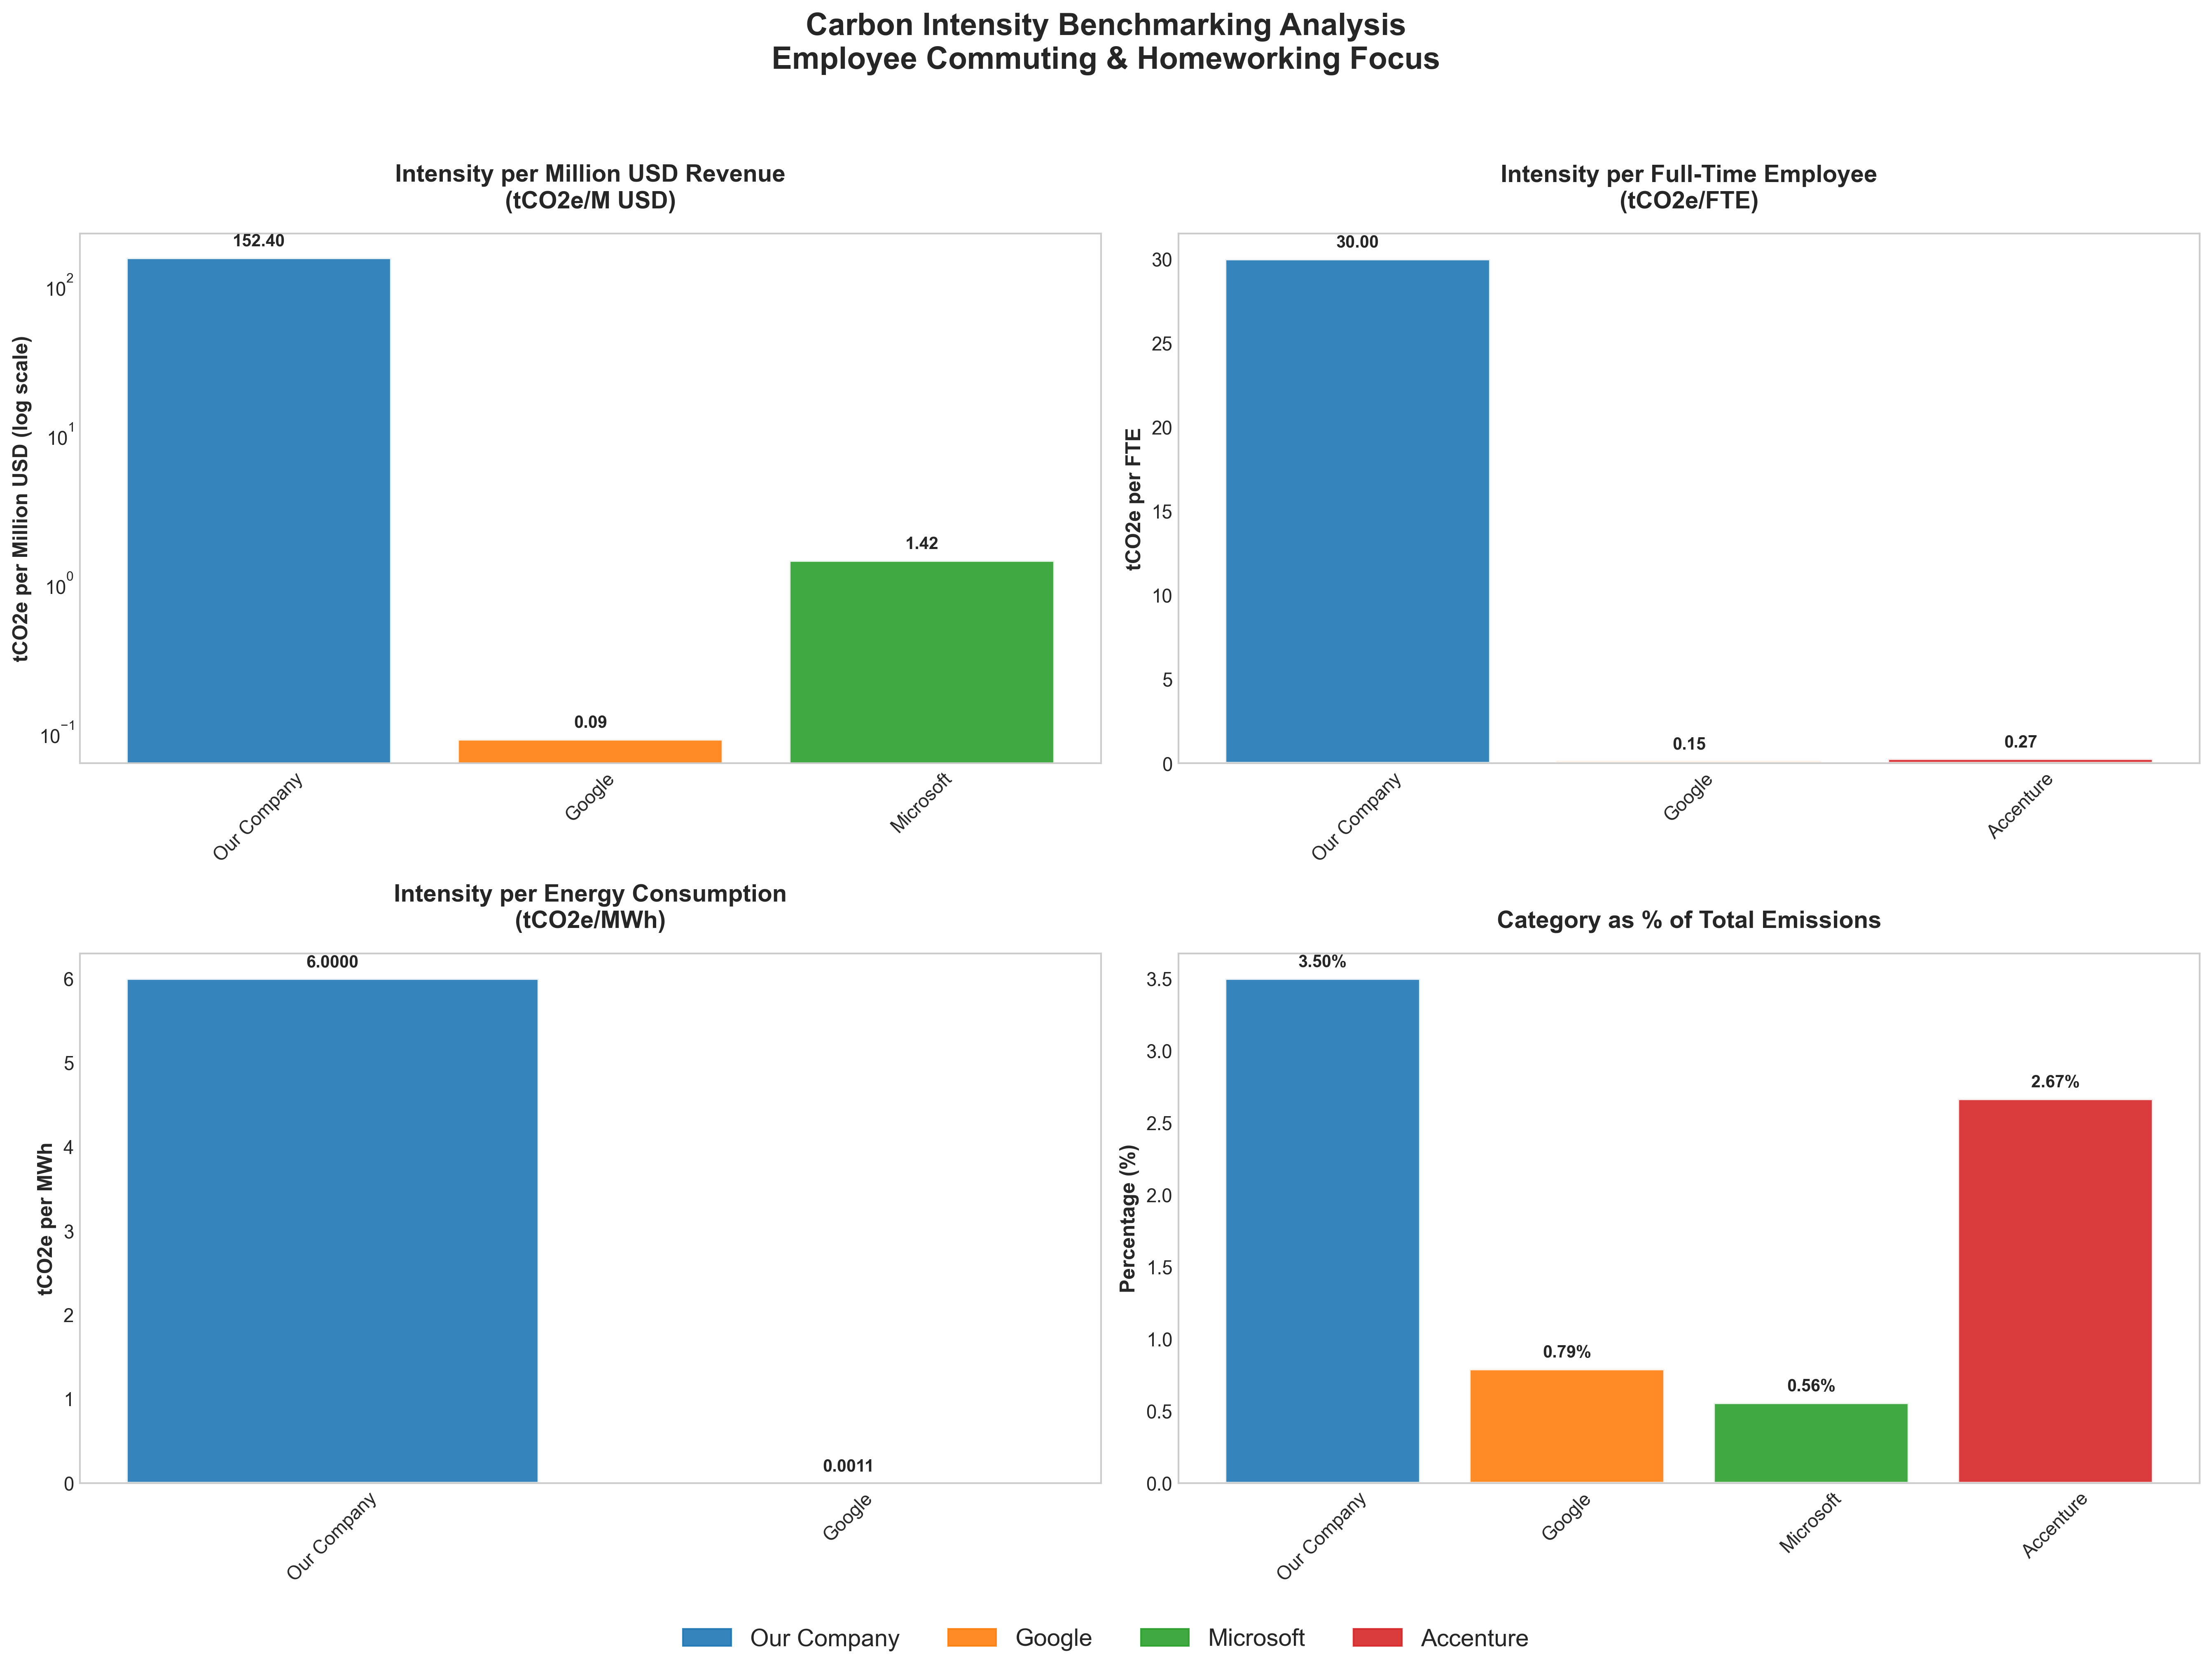

In [32]:
# Our company data (example values)
company_data = pd.DataFrame({
    'tCO2e_per_mGBP_revenue': [120],
    'tCO2e_per_FTE': [30],
    'tCO2e_per_MWh': [6]
})

# Our company data formatted for the benchmark DataFrame
our_company_data = {
    'Carbon Intensity per: M USD (tCO2e)': company_data['tCO2e_per_mGBP_revenue'].iloc[0] * 1.27,
    'Carbon Intensity per: FTE (tCO2e)': company_data['tCO2e_per_FTE'].iloc[0],
    'Carbon Intensity per: MWh (tCO2e)': company_data['tCO2e_per_MWh'].iloc[0],
    'Commuting as % of Total Emissions': 3.5
}

# Clean benchmark company data
def replace_not_available(d):
    return {k: (np.nan if v == 'Not Available' else v) for k, v in d.items()}

google_data_clean = replace_not_available(google_data)
microsoft_data_clean = replace_not_available(microsoft_data)
accenture_data_clean = replace_not_available(accenture_data)

# Create comprehensive benchmark DataFrame
benchmark_df = pd.DataFrame([our_company_data, google_data_clean, microsoft_data_clean, accenture_data_clean],
                           index=['Our Company', 'Google', 'Microsoft', 'Accenture'])


# --- 2. Optimized Plotting without Grid Lines ---

# Set style once
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Carbon Intensity Benchmarking Analysis\nEmployee Commuting & Homeworking Focus',
             fontsize=18, fontweight='bold', y=0.97)

# Create a dynamic color map
company_color_map = {
    'Our Company': '#1f77b4',
    'Google': '#ff7f0e',
    'Microsoft': '#2ca02c',
    'Accenture': '#d62728'
}

# Define a single, reusable plotting function
def plot_metric(ax, data_column, title, ylabel, label_format, log_scale=False):
    """Handles the creation of a single benchmark bar plot."""
    valid_data = benchmark_df[data_column].dropna()
    colors = [company_color_map[company] for company in valid_data.index]

    bars = ax.bar(valid_data.index, valid_data.values, color=colors, alpha=0.9, edgecolor='white', linewidth=1.5)

    ax.set_title(title, fontweight='bold', fontsize=14, pad=15)
    ax.set_ylabel(ylabel, fontweight='bold', fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    
    # --- This is the change ---
    ax.grid(False) # Turn off grid lines
    
    ax.set_axisbelow(True)

    if log_scale:
        ax.set_yscale('log')

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(label_format.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 5), textcoords="offset points",
                        ha='center', va='bottom', fontweight='bold', fontsize=10)

# Define all plot properties in a list
plot_definitions = [
    {'ax': axes[0, 0], 'col': 'Carbon Intensity per: M USD (tCO2e)', 'title': 'Intensity per Million USD Revenue\n(tCO2e/M USD)', 'ylabel': 'tCO2e per Million USD (log scale)', 'format': '{:.2f}', 'log': True},
    {'ax': axes[0, 1], 'col': 'Carbon Intensity per: FTE (tCO2e)', 'title': 'Intensity per Full-Time Employee\n(tCO2e/FTE)', 'ylabel': 'tCO2e per FTE', 'format': '{:.2f}', 'log': False},
    {'ax': axes[1, 0], 'col': 'Carbon Intensity per: MWh (tCO2e)', 'title': 'Intensity per Energy Consumption\n(tCO2e/MWh)', 'ylabel': 'tCO2e per MWh', 'format': '{:.4f}', 'log': False},
    {'ax': axes[1, 1], 'col': 'Commuting as % of Total Emissions', 'title': 'Category as % of Total Emissions', 'ylabel': 'Percentage (%)', 'format': '{:.2f}%', 'log': False}
]

# Loop through definitions to create each plot
for p in plot_definitions:
    plot_metric(p['ax'], p['col'], p['title'], p['ylabel'], p['format'], log_scale=p['log'])


# Add a shared legend at the bottom
legend_elements = [plt.Rectangle((0,0),1,1, color=color, alpha=0.9) for color in company_color_map.values()]
fig.legend(legend_elements, company_color_map.keys(),
           loc='lower center', bbox_to_anchor=(0.5, 0.01), ncol=4, fontsize=14, frameon=False)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.94])
plt.show()

<center>

### Overall Performance and Materiality

</center>

The analysis reveals two primary insights. First, for large technology corporations like Google and Microsoft, emissions from **employee commuting and homeworking** represent a very small fraction of their total carbon footprint, typically **less than 1%**. Their environmental impact is overwhelmingly dominated by data center energy consumption and supply chain activities. In contrast, for our company, these emissions are significantly more material, highlighting the importance of this detailed analysis for smaller, service-based firms where employee-related activities constitute a larger piece of the emissions pie.

Second, across all available metrics—intensity per revenue, per employee, and per MWh—our company demonstrates a significantly higher carbon intensity for its homeworking setups compared to the apportioned values of the benchmarked industry leaders. This suggests substantial opportunities for targeted improvements in energy efficiency and emissions reduction.

-----
<center>

### Key Insights

</center>

#### 1\. Intensity per Employee: The Most Direct Comparison

The most telling metric is the **Carbon Intensity per Full-Time Employee (FTE)**. The plot clearly shows that the tCO₂e per FTE for our company is substantially higher than the values for both Google and Accenture.

  * **Insight:** This indicates that, on an individual basis, our employees' homeworking environments are more carbon-intensive. The detailed survey data we've collected can pinpoint the cause: it may be due to a higher reliance on fossil fuels for heating (natural gas and oil), less efficient homes, or a lower adoption rate of renewable electricity tariffs compared to the employee populations of the benchmark companies. This is the most critical area for targeted action, such as promoting green energy suppliers.

#### 2\. Intensity per Revenue: A Measure of Carbon Efficiency

The **Carbon Intensity per Million USD** chart demonstrates the carbon efficiency of business operations.

  * **Insight:** Our company has a much higher carbon intensity relative to its revenue compared to giants like Google and Microsoft. While this is expected given their massive scale, it underscores that these industry leaders generate significantly more economic value for each tonne of CO2 emitted from their commuting and homeworking activities. Improving our energy efficiency is not just an environmental goal but also a step toward greater operational and economic efficiency.

#### 3\. Intensity per MWh: The Impact of Energy Source

The **Carbon Intensity per MWh** comparison between our company and Google is particularly stark.

  * **Insight:** This metric effectively measures the "cleanliness" of the energy being consumed. Google's near-zero value reflects its massive investment in procuring carbon-free energy, which means the electricity their employees use has a very low emissions factor. Our company's higher value directly points to a greater reliance on standard grid electricity (which includes fossil fuels) and the direct combustion of gas and oil for heating. This is the strongest evidence that **promoting and incentivizing the switch to renewable energy tariffs** is the single most effective lever we have to reduce our homeworking emissions.

#### 4\. Commuting as a Percentage of Total Emissions

This final chart provides crucial context on materiality.

  * **Insight:** At **3.5%**, commuting and homeworking make up a much larger share of our total emissions compared to Google (0.79%) and Microsoft (0.56%). This validates our decision to focus on this category in detail. For our specific business model, employee emissions are not a minor rounding error but a material part of our footprint that deserves strategic attention.

---
<center>

### References

</center>

- **Accenture (2024)**: 360° Value Report 2024. Available online: [Accenture](https://www.accenture.com/content/dam/accenture/final/corporate/company-information/document/Accenture-360-Value-Report-2024.pdf).
- **Any-lamp.co.uk (2021)**: Compare lumens to watts. Available online: [Any-lamp](https://www.any-lamp.co.uk/lumen-to-watt?switch=5132919066589766384).
- **Amazon (2024)**: CARBON METHODOLOGY Reaching Net Zero Carbon by 2040 Measuring, Mapping, and Reducing Carbon the Amazonian Way. [online] Available at: [Amazon](https://sustainability.aboutamazon.com/carbon-methodology.pdf).
- **BP (2021)**: Approximate conversion factors Statistical Review of World Energy. Available online: [bp](https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/pdfs/energy-economics/statistical-review/bp-stats-review-2022-approximate-conversion-factors.pdf).
- **Bittern Countryside Community Interest Company (2025)**: Bittern Countryside ‘Woodfuel Wisdom’. Available online: [BCCIC Woodfuel Guide](https://www.arnsidesilverdaleaonb.org.uk/uploads/2016/04/BCCICfactsheet3.pdf).
- **CaDI (2024)**: Greenhouse Gas Emissions Factors for International Grid Electricity (calculated from fuel mix). Available at: [www.carbondi.com](https://www.carbondi.com) (Accessed: [date]).
- **Climatiq.io. (2024)**: Emission Activity: Electricity supplied from grid | Climatiq. Available online: [Climatiq](https://www.climatiq.io/data/activity/electricity-supply_grid-source_supplier_mix) [Accessed 19 Jan. 2025].
- **Crown Oil Ltd (2025)**: Guide to Heating Oil. [online] Crown Oil. Available at: [Crown Oil](https://www.crownoil.co.uk/guides/heating-oil-guide/) [Accessed 21 Jan. 2025].
- **Department for Environment, Food & Rural Affairs (2020)**: Government takes action to cut pollution from household burning. Available online: [GOV.UK](https://www.gov.uk/government/news/government-takes-action-to-cut-pollution-from-household-burning).
- **EcoAct (2020)**: Homeworking emissions whitepaper. Available online: [Eco-act.com](https://info.eco-act.com/en/homeworking-emissions-whitepaper-2020?_gl=1).
- **Energy Saving Trust (2022)**: Guide to energy efficient lighting. [online] Energy Saving Trust. Available at: [Energy Saving Trust](https://energysavingtrust.org.uk/advice/lighting/) [Accessed 15 Jan. 2025].
- **European Nuclear Society (2019)**: Coal equivalent. Available online: [ENS](https://www.euronuclear.org/glossary/coal-equivalent/).
- **FirewoodFund.co.uk (2024)**: What does 1 cubic metre of firewood look like? - FirewoodFund. [online] FirewoodFund. Available at: [FirewoodFund](https://firewoodfund.co.uk/what-does-1-cubic-metre-of-firewood-look-like/) [Accessed 23 Jan. 2025].
- **GHG Protocol (2024)**: Emission Factors from Cross Sector Tools March 2017. Available online: [Ghgprotocol.org](https://ghgprotocol.org/sites/default/files/2024-05/Emission_Factors_for_Cross_Sector_Tools_V2.0_0.xlsx) [Accessed 20 Jan. 2025].
- **Google (2024)**: 2024 Environmental Report - Google Sustainability. [online] Sustainability. Available at: [Google](https://sustainability.google/reports/google-2024-environmental-report/) [Accessed 24 Jan. 2025].
- **Green Element (2023)**: Working From Home Emissions Research Paper. Available online: [Green Element](https://www.greenelement.co.uk/environmental-and-sustainability-ebooks/working-from-home-emissions/).
- **International Energy Agency (IEA) (2024)**: Greenhouse Gas Emissions from Energy Data Explorer – Data Tools. Available online: [IEA](https://www.iea.org/data-and-statistics/data-tools/greenhouse-gas-emissions-from-energy-data-explorer) [Accessed 18 Jan. 2025].
- **IPCC (2024)**: Emission Factor Database (EFDB). Available online: [IPCC EFDB](https://www.ipcc-nggip.iges.or.jp/EFDB/find_ef.php).
- **Kuo, T. & Nason, R. (2024)**: Hybrid remote work can reduce individual carbon footprints. PNAS, 121 (8). Available online: [PNAS](https://www.pnas.org/doi/full/10.1073/pnas.2304099120)
- **Microsoft (2024)**: How can we advance sustainability? 2024 Environmental Sustainability Report. [online] Available at: [Microsoft](https://cdn-dynmedia-1.microsoft.com/is/content/microsoftcorp/microsoft/msc/documents/presentations/CSR/2024-Environmental-Sustainability-Report-Data-Fact.pdf) [Accessed 25 Jan. 2025].
- **NHS - Business Services Authority (2018)**: How do I calculate a Full Time Equivalent (FTE)? Available online: [NHS](https://faq.nhsbsa.nhs.uk/knowledgebase/article/KA-23462/en-us).
- **OVO Energy (n.d.)**: How much energy do you use to heat your home, and what's the cost? Available online: [OVO Energy](https://www.ovoenergy.com/guides/energy-guides/how-much-heating-energy-do-you-use).
- **UN Department of Economic and Social Affairs (2022)**: 2022 Energy Balances. Available online: [UN Energy Balances](https://unstats.un.org/unsd/energystats/pubs/balance/2022/05.pdf).
- **UK Government (2019)**: Environmental reporting guidelines: including Streamlined Energy and Carbon Reporting requirements. [online] GOV.UK. Available at: [GOV.UK](https://www.gov.uk/government/publications/environmental-reporting-guidelines-including-mandatory-greenhouse-gas-emissions-reporting-guidance).
- **UK Government (2023)**: Methodology Paper for Conversion Factors Final Report. Available online: [gov.uk](https://assets.publishing.service.gov.uk/media/66a9fe4ca3c2a28abb50da4a/2024-greenhouse-gas-conversion-factors-methodology.pdf).
- **UK Government (2024)**: UK Government GHG Conversion Factors for Company Reporting. Available online: [gov.uk](https://www.gov.uk/government/publications/greenhouse-gas-reporting-conversion-factors-2024).
- **World Resources Institute (2024)**: Emission Factors from Cross Sector Tools March 2017. Available online: [WRI](https://ghgprotocol.org/sites/default/files/2024-05/Emission_Factors_for_Cross_Sector_Tools_V2.0_0.xlsx) [Accessed 20 Jan. 2025].